<a href="https://colab.research.google.com/github/xuwd11/deepul/blob/master/homeworks/hw3/Homework_3_Latent_Variable_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started

## Overview
This semester, all homeworks will be conducted through Google Colab notebooks. All code for the homework assignment will be written and run in this notebook. Running in Colab will automatically provide a GPU, but you may also run this notebook locally by following [these instructions](https://research.google.com/colaboratory/local-runtimes.html) if you wish to use your own GPU.

You will save images in the notebooks to use and fill out a given LaTeX template which will be submitted to Gradescope, along with your notebook code.

## Using Colab
On the left-hand side, you can click the different icons to see a Table of Contents of the assignment, as well as local files accessible through the notebook.

Make sure to go to **Runtime -> Change runtime type** and select **GPU** as the hardware accelerator. This allows you to use a GPU. Run the cells below to get started on the assignment. Note that a session is open for a maximum of 12 hours, and using too much GPU compute may result in restricted access for a short period of time. Please start the homework early so you have ample time to work.

**If you loaded this notebook from clicking "Open in Colab" from github, you will need to save it to your own Google Drive to keep your work.**

## General Tips
In each homework problem, you will implement an autoregressive model and run it on two datasets (dataset 1 and dataset 2). The expected outputs for dataset 1 are already provided to help as a sanity check.

Feel free to print whatever output (e.g. debugging code, training code, etc) you want, as the graded submission will be the submitted pdf with images.

After you complete the assignment, download all of the image outputted in the results/ folder and upload them to the figure folder in the given latex template.

Run the cells below to download and load up the starter code. It may take longer to run since we are using larger datasets.

In [ ]:
!nvidia-smi

Tue May 26 22:56:09 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
!if [ -d deepul ]; then rm -Rf deepul; fi
!git clone https://github.com/rll/deepul.git 
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1lWjGICwgzgcBDejo9S5g69hLAf0O3lGF' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1lWjGICwgzgcBDejo9S5g69hLAf0O3lGF" -O hw3_data.zip && rm -rf /tmp/cookies.txt
!unzip -qq hw3_data.zip -d deepul/homeworks/hw3/data
!rm hw3_data.zip
!pip install ./deepul

Cloning into 'deepul'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 749 (delta 25), reused 12 (delta 3), pack-reused 697
Receiving objects: 100% (749/749), 121.85 MiB | 28.70 MiB/s, done.
Resolving deltas: 100% (336/336), done.
--2020-05-26 22:56:23--  https://docs.google.com/uc?export=download&confirm=8UOk&id=1lWjGICwgzgcBDejo9S5g69hLAf0O3lGF
Resolving docs.google.com (docs.google.com)... 108.177.119.101, 108.177.119.102, 108.177.119.113, ...
Connecting to docs.google.com (docs.google.com)|108.177.119.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-10-docs.googleusercontent.com/docs/securesc/h92m91t8csj4dai4gmmrmj4e4f3163h1/97tcatok80ohhogmmnsj93te56bfu05d/1590533775000/06419056966375271799/14195788457961827780Z/1lWjGICwgzgcBDejo9S5g69hLAf0O3lGF?e=download [following]
--2020-05-26 22:56:23--  https://doc-0c-10-docs.googl

In [ ]:
from deepul.hw3_helper import *

# Question 1: VAEs on 2D Data [20pts]
In this question, you will train a simple VAE on 2D data, and look at situations in which latents are being used or not being used (i.e. when posterior collapse occurs)

## Part (a) Data from a Full Covariance Gaussian [10 pts]
In this part, we train a VAE on data generated from a Gaussian with a full covariance matrix. Execute the cell below to visualize the datasets.

Dataset 1


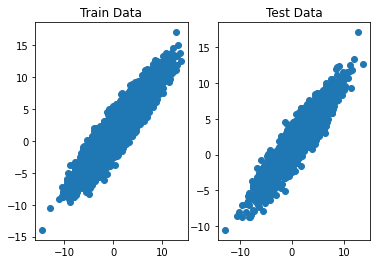

Dataset 2


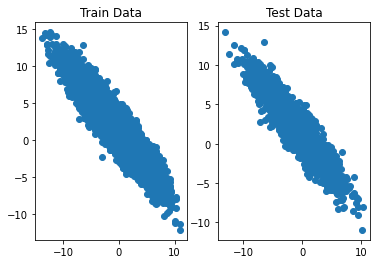

In [ ]:
visualize_q1_data('a', 1)
visualize_q1_data('a', 2)

Consruct and train a VAE with the following characteristics
*   2D latent variables $z$ with a standard normal prior, $p(z) = N(0, I)$
*   An approximate posterior $q_\theta(z|x) = N(z; \mu_\theta(x), \Sigma_\theta(x))$, where $\mu_\theta(x)$ is the mean vector, and $\Sigma_\theta(x)$ is a diagonal covariance matrix
*   A decoder $p(x|z) = N(x; \mu_\phi(z), \Sigma_\phi(z))$, where $\mu_\phi(z)$ is the mean vector, and $\Sigma_\phi(z)$ is a diagonal covariance matrix

**You will provide the following deliverables**


1.   Over the course of training, record the average full negative ELBO, reconstruction loss $E_xE_{z\sim q(z|x)}[-\log{p(x|z)}]$, and KL term $E_x[D_{KL}(q(z|x)||p(z))]$ of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. 
2.   Report the final test set performance of your final model
3. Samples of your trained VAE with ($z\sim p(z), x\sim N(x;\mu_\phi(z),\Sigma_\phi(z))$) and without ($z\sim p(z), x = \mu_\phi(z)$) decoder noise




### Solution
Fill out the function below and return the neccessary arguments. Feel free to create more cells if need be

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
from collections import OrderedDict
from tqdm import tqdm, tqdm_notebook

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def train_epoch(model, train_loader, optimizer, grad_clip=None):
    model.train()
    train_losses = OrderedDict()
    for x in tqdm_notebook(train_loader, desc='Batch', leave=False):
        x = x.to(device)
        out = model.loss(x)
        optimizer.zero_grad()
        out["loss"].backward()
        if grad_clip:
            torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
        optimizer.step()
        for k, v in out.items():
            if k not in train_losses:
                train_losses[k] = []
            train_losses[k].append(v.item())
    return train_losses

def eval_loss(model, data_loader):
    model.eval()
    total_loss = OrderedDict()
    with torch.no_grad():
        for x in data_loader:
            x = x.to(device)
            out = model.loss(x)
            for k, v in out.items():
                total_loss[k] = total_loss.get(k, 0) + v.item() * x.shape[0]
        for k in total_loss.keys():
            total_loss[k] /= len(data_loader.dataset)
    return total_loss

def train(model, train_loader, test_loader, train_args, print_every=None):
    t0 = time.time()
    n_epochs, lr = train_args["n_epochs"], train_args["lr"]
    grad_clip = train_args.get("grad_clip", None)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses, test_losses = OrderedDict(), OrderedDict()

    for epoch in tqdm_notebook(range(n_epochs), desc='Epoch', leave=False):
        train_loss = train_epoch(
            model=model, train_loader=train_loader, optimizer=optimizer, grad_clip=grad_clip
        )
        test_loss = eval_loss(model, test_loader)
        for k in train_loss.keys():
            if k not in train_losses:
                train_losses[k] = []
                test_losses[k] = []
            train_losses[k].extend(train_loss[k])
            test_losses[k].append(test_loss[k])
        e = epoch + 1
        if print_every and (e == 1 or e == n_epochs or e % print_every == 0):
            t = (time.time() - t0) / 60
            print(f"Epoch {e}, time elapsed {t:.3f} min")
            desc = "Train loss: "
            for k, v in train_loss.items():
                desc += f"{k} {np.mean(v):.4f}, "
            print(desc[:-2])
            desc = "Test loss: "
            for k, v in test_loss.items():
                desc += f"{k} {v:.4f}, "
            print(desc[:-2])
    return train_losses, test_losses

In [ ]:
# For debugging purpose

# train_data, test_data = q1_sample_data("a", 1)
# train_loader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True)
# test_loader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=False)

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_shape, output_shape, hidden_sizes):
        super().__init__()
        if isinstance(input_shape, int):
            input_shape = (input_shape, )
        if isinstance(output_shape, int):
            output_shape = (output_shape, )
        self.output_shape = output_shape
        model = []
        prev = np.prod(input_shape)
        for h in hidden_sizes + [np.prod(output_shape)]:
            model.append(nn.Linear(prev, h))
            model.append(nn.ReLU())
            prev = h
        model.pop()
        self.net = nn.Sequential(*model)

    def forward(self, x):
        batch_size = x.shape[0]
        x = x.view(batch_size, -1)
        return self.net(x).view(batch_size, *self.output_shape)

class MlpVAE(nn.Module):
    def __init__(self, input_shape, latent_dim, enc_hidden_sizes, dec_hidden_sizes):
        super().__init__()
        self.latent_dim = latent_dim
        self.encoder = MLP(input_shape, 2 * latent_dim, enc_hidden_sizes)
        output_shape = (2 * input_shape[0], ) + input_shape[1:]
        self.decoder = MLP(latent_dim, output_shape, dec_hidden_sizes)

    def loss(self, x):
        mu_z, log_std_z = self.encoder(x).chunk(2, dim=1)
        z = torch.randn_like(mu_z) * log_std_z.exp() + mu_z
        mu_x, log_std_x = self.decoder(z).chunk(2, dim=1)

        recon_loss = 0.5 * np.log(2 * np.pi) + log_std_x \
            + 0.5 * (x - mu_x) ** 2 * torch.exp(-2 * log_std_x)
        recon_loss = recon_loss.sum(1).mean()

        kl_loss = - log_std_z + 0.5 * (torch.exp(2 * log_std_z) + mu_z ** 2) - 0.5       
        kl_loss = kl_loss.sum(1).mean()
        return OrderedDict(loss=recon_loss + kl_loss, recon_loss=recon_loss, kl_loss=kl_loss)

    def sample(self, n, add_noise=True):
        with torch.no_grad():
            z = torch.randn(n, self.latent_dim).to(device)
            mu, log_std = self.decoder(z).chunk(2, dim=1)
            if add_noise:
                x = torch.randn_like(mu) * log_std.exp() + mu
            else:
                x = mu
        return x.cpu().numpy()


# For debugging purpose
# model = MlpVAE((2, ), 2, [128, 128], [128, 128]).to(device)
# for x in train_loader:
#     x = x.to(device).float()
#     print(x.shape)
#     with torch.no_grad():
#         print(model.loss(x))
#     break
# print(model.sample(10).shape)

In [ ]:
def q1(train_data, test_data, part, dset_id):
    """
    train_data: An (n_train, 2) numpy array of floats
    test_data: An (n_test, 2) numpy array of floats

    (You probably won't need to use the two inputs below, but they are there
     if you want to use them)
    part: An identifying string ('a' or 'b') of which part is being run. Most likely
          used to set different hyperparameters for different datasets
    dset_id: An identifying number of which dataset is given (1 or 2). Most likely
               used to set different hyperparameters for different datasets

    Returns
    - a (# of training iterations, 3) numpy array of full negative ELBO, reconstruction loss E[-log p(x|z)],
      and KL term E[KL(q(z|x) | p(z))] evaluated every minibatch
    - a (# of epochs + 1, 3) numpy array of full negative ELBO, reconstruciton loss E[-p(x|z)],
      and KL term E[KL(q(z|x) | p(z))] evaluated once at initialization and after each epoch
    - a numpy array of size (1000, 2) of 1000 samples WITH decoder noise, i.e. sample z ~ p(z), x ~ p(x|z)
    - a numpy array of size (1000, 2) of 1000 samples WITHOUT decoder noise, i.e. sample z ~ p(z), x = mu(z)
    """

    """ YOUR CODE HERE """ 
    model = MlpVAE((2, ), 2, [128, 128], [128, 128]).to(device)
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=False)
    train_losses, test_losses = train(
        model, train_loader, test_loader, dict(n_epochs=10, lr=1e-3), print_every=1
    )
    train_losses = np.stack(
        (train_losses["loss"], train_losses["recon_loss"], train_losses["kl_loss"]), axis=1
    )
    test_losses = np.stack(
        (test_losses["loss"], test_losses["recon_loss"], test_losses["kl_loss"]), axis=1
    )
    samples_noise = model.sample(1000, add_noise=True)
    samples_nonoise = model.sample(1000, add_noise=False)
    return train_losses, test_losses, samples_noise, samples_nonoise

### Results
Once you've finished `q1_a`, execute the cells below to visualize and save your results.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Epoch 1, time elapsed 0.007 min
Train loss: loss 5.8484, recon_loss 5.6154, kl_loss 0.2330
Test loss: loss 5.3787, recon_loss 5.2927, kl_loss 0.0860


Epoch 2, time elapsed 0.014 min
Train loss: loss 5.3959, recon_loss 5.3360, kl_loss 0.0599
Test loss: loss 5.3741, recon_loss 5.3131, kl_loss 0.0610


Epoch 3, time elapsed 0.021 min
Train loss: loss 5.3835, recon_loss 5.3331, kl_loss 0.0504
Test loss: loss 5.3709, recon_loss 5.3011, kl_loss 0.0697


Epoch 4, time elapsed 0.027 min
Train loss: loss 5.3654, recon_loss 5.2580, kl_loss 0.1074
Test loss: loss 5.3444, recon_loss 5.1378, kl_loss 0.2066


Epoch 5, time elapsed 0.034 min
Train loss: loss 5.0720, recon_loss 4.3947, kl_loss 0.6773
Test loss: loss 4.6966, recon_loss 3.2587, kl_loss 1.4379


Epoch 6, time elapsed 0.041 min
Train loss: loss 4.5167, recon_loss 3.0101, kl_loss 1.5067
Test loss: loss 4.4390, recon_loss 2.8221, kl_loss 1.6169


Epoch 7, time elapsed 0.048 min
Train loss: loss 4.5085, recon_loss 2.9291, kl_loss 1.5794
Test loss: loss 4.4529, recon_loss 2.8998, kl_loss 1.5531


Epoch 8, time elapsed 0.054 min
Train loss: loss 4.4941, recon_loss 2.9281, kl_loss 1.5660
Test loss: loss 4.4388, recon_loss 2.8429, kl_loss 1.5959


Epoch 9, time elapsed 0.061 min
Train loss: loss 4.4699, recon_loss 2.8799, kl_loss 1.5900
Test loss: loss 4.4442, recon_loss 2.8209, kl_loss 1.6232


Epoch 10, time elapsed 0.069 min
Train loss: loss 4.4692, recon_loss 2.8716, kl_loss 1.5977
Test loss: loss 4.4728, recon_loss 2.9137, kl_loss 1.5590
Final -ELBO: 4.4728, Recon Loss: 2.9137, KL Loss: 1.5590


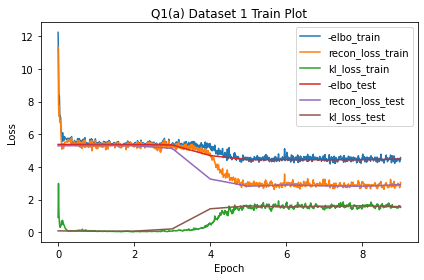

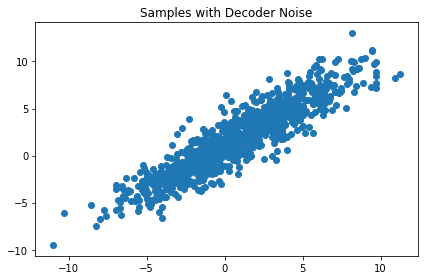

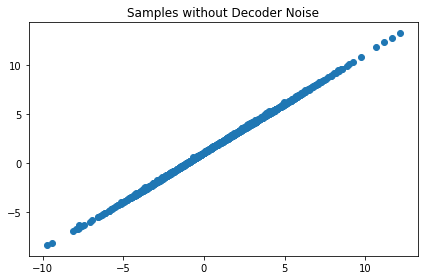

CPU times: user 6.81 s, sys: 1.34 s, total: 8.14 s
Wall time: 7.94 s


In [ ]:
%%time

q1_save_results('a', 1, q1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Epoch 1, time elapsed 0.008 min
Train loss: loss 5.8832, recon_loss 5.4853, kl_loss 0.3979
Test loss: loss 5.3378, recon_loss 5.1192, kl_loss 0.2186


Epoch 2, time elapsed 0.014 min
Train loss: loss 5.2660, recon_loss 4.9508, kl_loss 0.3153
Test loss: loss 5.1562, recon_loss 4.5586, kl_loss 0.5976


Epoch 3, time elapsed 0.021 min
Train loss: loss 4.9534, recon_loss 3.9854, kl_loss 0.9680
Test loss: loss 4.7550, recon_loss 3.5040, kl_loss 1.2510


Epoch 4, time elapsed 0.028 min
Train loss: loss 4.6812, recon_loss 3.2913, kl_loss 1.3899
Test loss: loss 4.5797, recon_loss 3.1131, kl_loss 1.4666


Epoch 5, time elapsed 0.034 min
Train loss: loss 4.5453, recon_loss 3.0447, kl_loss 1.5005
Test loss: loss 4.4866, recon_loss 2.8676, kl_loss 1.6189


Epoch 6, time elapsed 0.041 min
Train loss: loss 4.4739, recon_loss 2.9151, kl_loss 1.5588
Test loss: loss 4.4568, recon_loss 2.8586, kl_loss 1.5981


Epoch 7, time elapsed 0.047 min
Train loss: loss 4.4604, recon_loss 2.8958, kl_loss 1.5646
Test loss: loss 4.4341, recon_loss 2.9289, kl_loss 1.5052


Epoch 8, time elapsed 0.054 min
Train loss: loss 4.4581, recon_loss 2.8778, kl_loss 1.5802
Test loss: loss 4.4517, recon_loss 2.8867, kl_loss 1.5650


Epoch 9, time elapsed 0.061 min
Train loss: loss 4.4674, recon_loss 2.8921, kl_loss 1.5753
Test loss: loss 4.4503, recon_loss 2.9682, kl_loss 1.4821


Epoch 10, time elapsed 0.067 min
Train loss: loss 4.4625, recon_loss 2.8891, kl_loss 1.5734
Test loss: loss 4.4858, recon_loss 2.8970, kl_loss 1.5887
Final -ELBO: 4.4858, Recon Loss: 2.8970, KL Loss: 1.5887


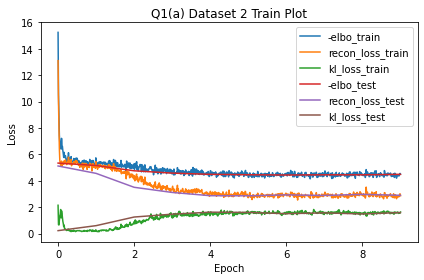

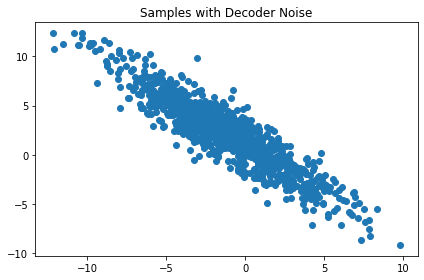

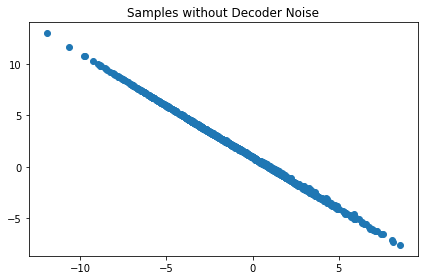

CPU times: user 4.57 s, sys: 489 ms, total: 5.06 s
Wall time: 4.81 s


In [ ]:
%%time

q1_save_results('a', 2, q1)

## Part (b) Data from a Diagonal Gaussian [10pts]
In this part, we use your code from the previous part to train a VAE on data generated from a diagonal gaussian. Execute the cell below to visualize the datasets (note that they may look the same, but notice the axes)

Dataset 1


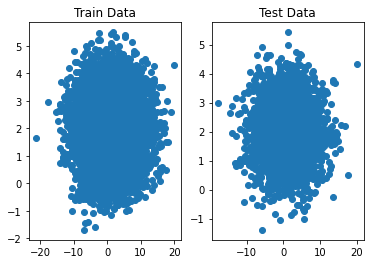

Dataset 2


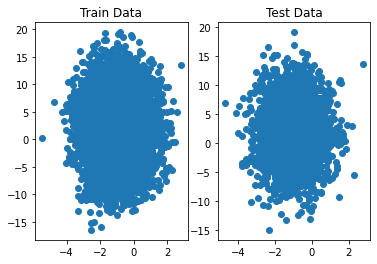

In [ ]:
visualize_q1_data('b', 1)
visualize_q1_data('b', 2)

### Results
Execute the cells below to visualize and save your results.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Epoch 1, time elapsed 0.007 min
Train loss: loss 5.9924, recon_loss 5.5506, kl_loss 0.4419
Test loss: loss 4.5038, recon_loss 4.4813, kl_loss 0.0225


Epoch 2, time elapsed 0.014 min
Train loss: loss 4.4647, recon_loss 4.4389, kl_loss 0.0258
Test loss: loss 4.4328, recon_loss 4.4102, kl_loss 0.0226


Epoch 3, time elapsed 0.021 min
Train loss: loss 4.4409, recon_loss 4.4222, kl_loss 0.0187
Test loss: loss 4.4244, recon_loss 4.4075, kl_loss 0.0169


Epoch 4, time elapsed 0.030 min
Train loss: loss 4.4363, recon_loss 4.4207, kl_loss 0.0156
Test loss: loss 4.4286, recon_loss 4.4127, kl_loss 0.0159


Epoch 5, time elapsed 0.038 min
Train loss: loss 4.4417, recon_loss 4.4292, kl_loss 0.0125
Test loss: loss 4.4258, recon_loss 4.4179, kl_loss 0.0078


Epoch 6, time elapsed 0.046 min
Train loss: loss 4.4392, recon_loss 4.4291, kl_loss 0.0101
Test loss: loss 4.4263, recon_loss 4.4161, kl_loss 0.0102


Epoch 7, time elapsed 0.054 min
Train loss: loss 4.4417, recon_loss 4.4321, kl_loss 0.0096
Test loss: loss 4.4264, recon_loss 4.4185, kl_loss 0.0079


Epoch 8, time elapsed 0.062 min
Train loss: loss 4.4344, recon_loss 4.4235, kl_loss 0.0110
Test loss: loss 4.4240, recon_loss 4.4110, kl_loss 0.0130


Epoch 9, time elapsed 0.069 min
Train loss: loss 4.4336, recon_loss 4.4241, kl_loss 0.0095
Test loss: loss 4.4258, recon_loss 4.4205, kl_loss 0.0052


Epoch 10, time elapsed 0.076 min
Train loss: loss 4.4393, recon_loss 4.4336, kl_loss 0.0057
Test loss: loss 4.4245, recon_loss 4.4196, kl_loss 0.0049
Final -ELBO: 4.4245, Recon Loss: 4.4196, KL Loss: 0.0049


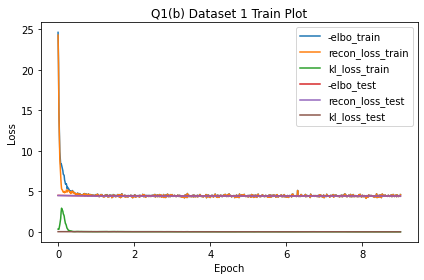

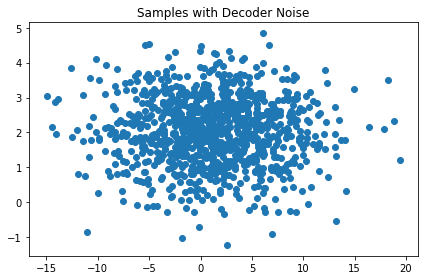

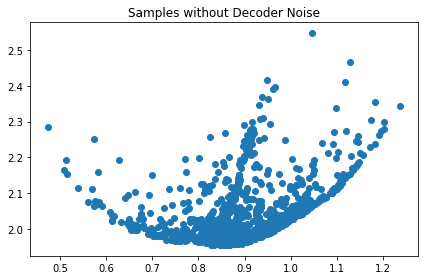

CPU times: user 5.13 s, sys: 511 ms, total: 5.64 s
Wall time: 5.39 s


In [ ]:
%%time

q1_save_results('b', 1, q1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Epoch 1, time elapsed 0.007 min
Train loss: loss 5.2928, recon_loss 5.0221, kl_loss 0.2708
Test loss: loss 4.4593, recon_loss 4.4090, kl_loss 0.0503


Epoch 2, time elapsed 0.014 min
Train loss: loss 4.4450, recon_loss 4.4083, kl_loss 0.0367
Test loss: loss 4.4317, recon_loss 4.4033, kl_loss 0.0284


Epoch 3, time elapsed 0.021 min
Train loss: loss 4.4411, recon_loss 4.4216, kl_loss 0.0195
Test loss: loss 4.4214, recon_loss 4.4040, kl_loss 0.0174


Epoch 4, time elapsed 0.027 min
Train loss: loss 4.4383, recon_loss 4.4212, kl_loss 0.0171
Test loss: loss 4.4327, recon_loss 4.4172, kl_loss 0.0155


Epoch 5, time elapsed 0.034 min
Train loss: loss 4.4381, recon_loss 4.4245, kl_loss 0.0136
Test loss: loss 4.4263, recon_loss 4.4110, kl_loss 0.0153


Epoch 6, time elapsed 0.043 min
Train loss: loss 4.4415, recon_loss 4.4258, kl_loss 0.0157
Test loss: loss 4.4256, recon_loss 4.4115, kl_loss 0.0141


Epoch 7, time elapsed 0.049 min
Train loss: loss 4.4375, recon_loss 4.4245, kl_loss 0.0130
Test loss: loss 4.4234, recon_loss 4.4137, kl_loss 0.0096


Epoch 8, time elapsed 0.056 min
Train loss: loss 4.4359, recon_loss 4.4272, kl_loss 0.0087
Test loss: loss 4.4289, recon_loss 4.4224, kl_loss 0.0065


Epoch 9, time elapsed 0.063 min
Train loss: loss 4.4339, recon_loss 4.4252, kl_loss 0.0087
Test loss: loss 4.4329, recon_loss 4.4235, kl_loss 0.0094


Epoch 10, time elapsed 0.071 min
Train loss: loss 4.4343, recon_loss 4.4266, kl_loss 0.0077
Test loss: loss 4.4202, recon_loss 4.4141, kl_loss 0.0061
Final -ELBO: 4.4202, Recon Loss: 4.4141, KL Loss: 0.0061


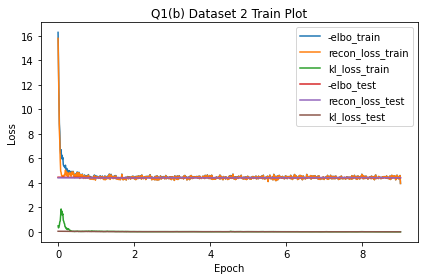

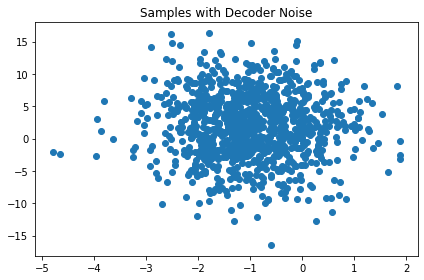

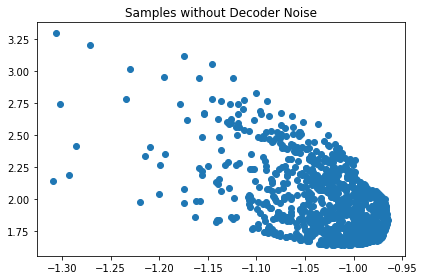

CPU times: user 4.94 s, sys: 462 ms, total: 5.4 s
Wall time: 5.18 s


In [ ]:
%%time

q1_save_results('b', 2, q1)

### Reflection
Compare the sampled xs with and without decoder noise in parts (a) and (b). For which datasets are the latents being used? Why is this happening (i.e. why are the latents being ignored in some cases)? **Write your answer (1-2 sentences) in the given latex template**

Answer: The latents are being used in part (a), but not in part (b). This is because the dataset in part (a) comes from a diagonal gaussian distribution so the decoder (also diagonal gaussian) can optimally model the data without the encoder / latents. However, for (a), the data come from a multivariate gaussian with non-diagonal covariance, so the encoder is used to achieve a better loss than without.

# Question 2: VAEs on Images [40pts]
In this question, you will train different VAE models on image datasets. Execute the cell below to visualize the two datasets (colored shapes, and [SVHN](http://ufldl.stanford.edu/housenumbers/)).

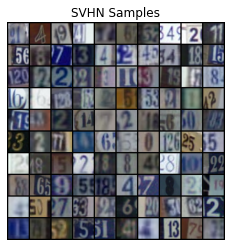

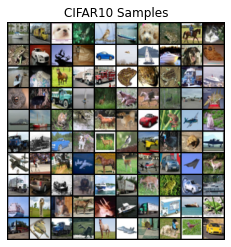

In [ ]:
visualize_svhn()
visualize_cifar10()

## Part (a) VAE [20pts]
In this part, implement a standard VAE with the following characteristics:

*   16-dim latent variables $z$ with standard normal prior $p(z) = N(0,I)$
*   An approximate posterior $q_\theta(z|x) = N(z; \mu_\theta(x), \Sigma_\theta(x))$, where $\mu_\theta(x)$ is the mean vector, and $\Sigma_\theta(x)$ is a diagonal covariance matrix
*   A decoder $p(x|z) = N(x; \mu_\phi(z), I)$, where $\mu_\phi(z)$ is the mean vector. (We are not learning the covariance of the decoder)

You can play around with different architectures and try for better results, but the following encoder / decoder architecture below suffices (Note that image input is always $32\times 32$.
```
conv2d(in_channels, out_channels, kernel_size, stride, padding)
transpose_conv2d(in_channels, out_channels, kernel_size, stride, padding)
linear(in_dim, out_dim)

Encoder
    conv2d(3, 32, 3, 1, 1)
    relu()
    conv2d(32, 64, 3, 2, 1) # 16 x 16
    relu() 
    conv2d(64, 128, 3, 2, 1) # 8 x 8
    relu()
    conv2d(128, 256, 3, 2, 1) # 4 x 4
    relu()
    flatten()
    linear(4 * 4 * 256, 2 * latent_dim)

Decoder
    linear(latent_dim, 4 * 4 * 128)
    relu()
    reshape(4, 4, 128)
    transpose_conv2d(128, 128, 4, 2, 1) # 8 x 8
    relu()
    transpose_conv2d(128, 64, 4, 2, 1) # 16 x 16
    relu()
    transpose_conv2d(64, 32, 4, 2, 1) # 32 x 32
    relu()
    conv2d(32, 3, 3, 1, 1)
```

You may find the following training tips helpful
*   When computing reconstruction loss and KL loss, average over the batch dimension and **sum** over the feature dimension
*   When computing reconstruction loss, it suffices to just compute MSE between the reconstructed $x$ and true $x$ (you can compute the extra constants if you want)
*   Use batch size 128, learning rate $10^{-3}$, and an Adam optimizer




**You will provide the following deliverables**


1.   Over the course of training, record the average full negative ELBO, reconstruction loss, and KL term of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. 
2.   Report the final test set performance of your final model
3. 100 samples from your trained VAE
4. 50 real-image / reconstruction pairs (for some $x$, encode and then decode)
5. Interpolations of length 10 between 10 pairs of test images from your VAE (100 images total)



### Solution
Fill out the function below and return the neccessary arguments. Feel free to create more cells if need be

In [ ]:
# For debugging purpose

# data_dir = get_data_dir(3)
# train_data, test_data = load_pickled_data(join(data_dir, 'svhn.pkl'))
# train_data = (np.transpose(train_data, (0, 3, 1, 2)) / 255.).astype('float32')
# test_data = (np.transpose(test_data, (0, 3, 1, 2)) / 255.).astype('float32')
# train_loader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True)
# test_loader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=False)

In [ ]:
class ConvEncoder(nn.Module):
    def __init__(self, input_shape, latent_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(input_shape[0], 32, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, 3, stride=2, padding=1),
        )
        out_dim = input_shape[1] // 8 * input_shape[2] // 8 * 256
        self.linear = nn.Linear(out_dim, 2 * latent_dim)

    def forward(self, x):
        out = self.net(x)
        out = out.view(out.shape[0], -1)
        mu, log_std = self.linear(out).chunk(2, dim=1)
        return mu, log_std

class ConvDecoder(nn.Module):
    def __init__(self, latent_dim, output_shape):
        super().__init__()
        self.base_size = (128, output_shape[1] // 8, output_shape[2] // 8)
        self.linear = nn.Linear(latent_dim, np.prod(self.base_size))
        self.net = nn.Sequential(
            nn.ReLU(), 
            nn.ConvTranspose2d(128, 128, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, output_shape[0], 3, padding=1),
        )

    def forward(self, z):
        out = self.linear(z)
        out = out.view(out.shape[0], *self.base_size)
        out = self.net(out)
        return out

class ConvVAE(nn.Module):
    def __init__(self, input_shape, latent_dim):
        super().__init__()
        assert len(input_shape) == 3
        self.latent_dim = latent_dim
        self.encoder = ConvEncoder(input_shape, latent_dim)
        self.decoder = ConvDecoder(latent_dim, input_shape)

    def loss(self, x):
        x = 2 * x - 1
        mu, log_std = self.encoder(x)
        z = torch.randn_like(mu) * log_std.exp() + mu
        x_recon = self.decoder(z)
        recon_loss = F.mse_loss(x, x_recon, reduction="none").view(x.shape[0], -1).sum(1).mean()
        kl_loss = - log_std + 0.5 * (torch.exp(2 * log_std) + mu ** 2) - 0.5
        kl_loss = kl_loss.sum(1).mean()
        return OrderedDict(loss=recon_loss + kl_loss, recon_loss=recon_loss, kl_loss=kl_loss)

    def sample(self, n):
        with torch.no_grad():
            z = torch.randn(n, self.latent_dim).to(device)
            samples = torch.clamp(self.decoder(z), -1, 1)
        return samples.cpu().permute(0, 2, 3, 1).numpy() * 0.5 + 0.5
        

# For debugging purpose

# model = ConvVAE(tuple(train_data.shape[1:]), 16).to(device)
# for x in train_loader:
#     x = x.to(device).float()
#     print(x.shape)
#     with torch.no_grad():
#         print(model.loss(x))
#     break
# print(model.sample(10).shape)

In [ ]:
def q2_a(train_data, test_data, dset_id):
    """
    train_data: An (n_train, 32, 32, 3) uint8 numpy array of color images with values in {0, ..., 255}
    test_data: An (n_test, 32, 32, 3) uint8 numpy array of color images with values in {0, ..., 255}
    dset_id: An identifying number of which dataset is given (1 or 2). Most likely
               used to set different hyperparameters for different datasets

    Returns
    - a (# of training iterations, 3) numpy array of full negative ELBO, reconstruction loss E[-log p(x|z)],
      and KL term E[KL(q(z|x) | p(z))] evaluated every minibatch
    - a (# of epochs + 1, 3) numpy array of full negative ELBO, reconstruciton loss E[-p(x|z)],
      and KL term E[KL(q(z|x) | p(z))] evaluated once at initialization and after each epoch
    - a (100, 32, 32, 3) numpy array of 100 samples from your VAE with values in {0, ..., 255}
    - a (100, 32, 32, 3) numpy array of 50 real image / reconstruction pairs
      FROM THE TEST SET with values in {0, ..., 255}
    - a (100, 32, 32, 3) numpy array of 10 interpolations of length 10 between
      pairs of test images. The output should be those 100 images flattened into
      the specified shape with values in {0, ..., 255}
    """

    """ YOUR CODE HERE """
    train_data = (np.transpose(train_data, (0, 3, 1, 2)) / 255.).astype('float32')
    test_data = (np.transpose(test_data, (0, 3, 1, 2)) / 255.).astype('float32')
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=False)

    input_shape = tuple(train_data.shape[1:])
    model = ConvVAE(input_shape, 16).to(device)
    train_losses, test_losses = train(
        model, train_loader, test_loader, dict(n_epochs=20, lr=1e-3), print_every=1
    )
    train_losses = np.stack(
        (train_losses["loss"], train_losses["recon_loss"], train_losses["kl_loss"]), axis=1
    )
    test_losses = np.stack(
        (test_losses["loss"], test_losses["recon_loss"], test_losses["kl_loss"]), axis=1
    )
    samples = model.sample(100) * 255

    x = next(iter(test_loader))[:50].to(device)
    with torch.no_grad():
        x = 2 * x - 1
        z, _ = model.encoder(x)
        x_recon = torch.clamp(model.decoder(z), -1, 1)
        recons = torch.stack((x, x_recon), dim=1).view(-1, *input_shape) * 0.5 + 0.5
        recons = recons.permute(0, 2, 3, 1).cpu().numpy() * 255

    x = next(iter(test_loader))[:20].to(device)
    with torch.no_grad():
        x = 2 * x - 1
        z, _ = model.encoder(x)
        z1, z2 = z.chunk(2, dim=0)
        interps = [model.decoder(z1 * (1 - a) + z2 * a) for a in np.linspace(0, 1, 10)]
        interps = torch.stack(interps, dim=1).view(-1, *input_shape)
        interps = torch.clamp(interps, -1, 1) * 0.5 + 0.5
        interps = interps.permute(0, 2, 3, 1).cpu().numpy() * 255
    return train_losses, test_losses, samples, recons, interps

### Results
Once you've finished `q2_a`, execute the cells below to visualize and save your results.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Epoch 1, time elapsed 0.047 min
Train loss: loss 328.0606, recon_loss 316.9736, kl_loss 11.0871
Test loss: loss 249.5236, recon_loss 237.4875, kl_loss 12.0361


Epoch 2, time elapsed 0.092 min
Train loss: loss 187.3717, recon_loss 172.1502, kl_loss 15.2216
Test loss: loss 178.4534, recon_loss 159.5122, kl_loss 18.9412


Epoch 3, time elapsed 0.138 min
Train loss: loss 153.4733, recon_loss 135.2920, kl_loss 18.1813
Test loss: loss 154.3514, recon_loss 134.5916, kl_loss 19.7598


Epoch 4, time elapsed 0.183 min
Train loss: loss 134.1474, recon_loss 114.5774, kl_loss 19.5699
Test loss: loss 153.2150, recon_loss 130.3136, kl_loss 22.9013


Epoch 5, time elapsed 0.228 min
Train loss: loss 125.1166, recon_loss 104.6559, kl_loss 20.4607
Test loss: loss 137.7647, recon_loss 113.8171, kl_loss 23.9475


Epoch 6, time elapsed 0.273 min
Train loss: loss 114.9135, recon_loss 92.8593, kl_loss 22.0542
Test loss: loss 119.0195, recon_loss 94.7422, kl_loss 24.2773


Epoch 7, time elapsed 0.318 min
Train loss: loss 107.5434, recon_loss 84.2827, kl_loss 23.2607
Test loss: loss 113.1371, recon_loss 87.8630, kl_loss 25.2741


Epoch 8, time elapsed 0.364 min
Train loss: loss 102.5367, recon_loss 79.0161, kl_loss 23.5206
Test loss: loss 110.4090, recon_loss 85.4196, kl_loss 24.9895


Epoch 9, time elapsed 0.410 min
Train loss: loss 101.3199, recon_loss 77.8378, kl_loss 23.4821
Test loss: loss 109.6025, recon_loss 83.5129, kl_loss 26.0896


Epoch 10, time elapsed 0.455 min
Train loss: loss 100.3905, recon_loss 76.9272, kl_loss 23.4633
Test loss: loss 106.6033, recon_loss 82.2339, kl_loss 24.3694


Epoch 11, time elapsed 0.501 min
Train loss: loss 98.6172, recon_loss 75.2051, kl_loss 23.4121
Test loss: loss 106.8646, recon_loss 82.2363, kl_loss 24.6283


Epoch 12, time elapsed 0.546 min
Train loss: loss 99.1294, recon_loss 75.7367, kl_loss 23.3927
Test loss: loss 106.8988, recon_loss 79.8328, kl_loss 27.0660


Epoch 13, time elapsed 0.591 min
Train loss: loss 96.6566, recon_loss 73.2507, kl_loss 23.4059
Test loss: loss 106.5052, recon_loss 81.4366, kl_loss 25.0686


Epoch 14, time elapsed 0.637 min
Train loss: loss 96.3995, recon_loss 73.0417, kl_loss 23.3578
Test loss: loss 104.9724, recon_loss 79.4902, kl_loss 25.4822


Epoch 15, time elapsed 0.682 min
Train loss: loss 95.6041, recon_loss 72.2488, kl_loss 23.3553
Test loss: loss 104.8521, recon_loss 80.8307, kl_loss 24.0213


Epoch 16, time elapsed 0.727 min
Train loss: loss 94.8694, recon_loss 71.4577, kl_loss 23.4118
Test loss: loss 105.0545, recon_loss 81.7759, kl_loss 23.2786


Epoch 17, time elapsed 0.772 min
Train loss: loss 94.8798, recon_loss 71.6108, kl_loss 23.2690
Test loss: loss 107.7433, recon_loss 82.5690, kl_loss 25.1742


Epoch 18, time elapsed 0.818 min
Train loss: loss 93.7950, recon_loss 70.3770, kl_loss 23.4180
Test loss: loss 107.4328, recon_loss 82.9817, kl_loss 24.4511


Epoch 19, time elapsed 0.863 min
Train loss: loss 92.9600, recon_loss 69.5520, kl_loss 23.4080
Test loss: loss 105.2024, recon_loss 77.9060, kl_loss 27.2963


Epoch 20, time elapsed 0.908 min
Train loss: loss 92.4926, recon_loss 69.0452, kl_loss 23.4473
Test loss: loss 103.3770, recon_loss 79.1452, kl_loss 24.2318
Final -ELBO: 103.3770, Recon Loss: 79.1452, KL Loss: 24.2318


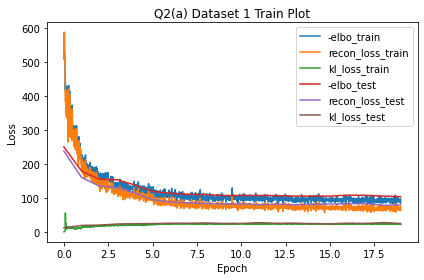

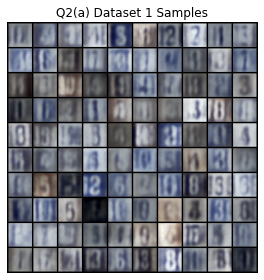

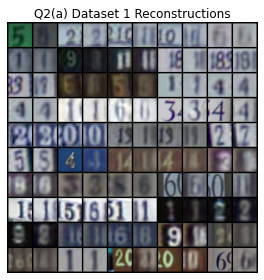

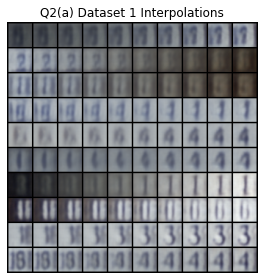

CPU times: user 38.6 s, sys: 15.9 s, total: 54.5 s
Wall time: 55.8 s


In [ ]:
%%time

q2_save_results('a', 1, q2_a)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Epoch 1, time elapsed 0.197 min
Train loss: loss 385.7765, recon_loss 361.3713, kl_loss 24.4052
Test loss: loss 280.1943, recon_loss 249.9708, kl_loss 30.2235


Epoch 2, time elapsed 0.393 min
Train loss: loss 262.7761, recon_loss 232.6338, kl_loss 30.1423
Test loss: loss 250.8654, recon_loss 220.7297, kl_loss 30.1357


Epoch 3, time elapsed 0.590 min
Train loss: loss 249.3709, recon_loss 219.2180, kl_loss 30.1528
Test loss: loss 248.1045, recon_loss 215.8988, kl_loss 32.2058


Epoch 4, time elapsed 0.788 min
Train loss: loss 245.4703, recon_loss 215.3255, kl_loss 30.1448
Test loss: loss 245.7378, recon_loss 216.1671, kl_loss 29.5707


Epoch 5, time elapsed 0.984 min
Train loss: loss 243.6853, recon_loss 213.5627, kl_loss 30.1226
Test loss: loss 244.5158, recon_loss 213.5642, kl_loss 30.9517


Epoch 6, time elapsed 1.181 min
Train loss: loss 242.5722, recon_loss 212.3859, kl_loss 30.1863
Test loss: loss 243.4537, recon_loss 213.5824, kl_loss 29.8713


Epoch 7, time elapsed 1.377 min
Train loss: loss 241.0152, recon_loss 210.7739, kl_loss 30.2413
Test loss: loss 246.9787, recon_loss 216.7819, kl_loss 30.1968


Epoch 8, time elapsed 1.574 min
Train loss: loss 240.2183, recon_loss 209.9293, kl_loss 30.2889
Test loss: loss 242.1728, recon_loss 212.5346, kl_loss 29.6382


Epoch 9, time elapsed 1.769 min
Train loss: loss 239.1545, recon_loss 208.8251, kl_loss 30.3294
Test loss: loss 241.9291, recon_loss 211.4949, kl_loss 30.4342


Epoch 10, time elapsed 1.965 min
Train loss: loss 238.2772, recon_loss 207.8955, kl_loss 30.3817
Test loss: loss 241.5470, recon_loss 211.1216, kl_loss 30.4255


Epoch 11, time elapsed 2.160 min
Train loss: loss 237.3181, recon_loss 206.9282, kl_loss 30.3899
Test loss: loss 241.0014, recon_loss 211.8942, kl_loss 29.1072


Epoch 12, time elapsed 2.355 min
Train loss: loss 236.6383, recon_loss 206.1995, kl_loss 30.4389
Test loss: loss 240.6862, recon_loss 210.0434, kl_loss 30.6428


Epoch 13, time elapsed 2.551 min
Train loss: loss 235.9565, recon_loss 205.4507, kl_loss 30.5058
Test loss: loss 242.3953, recon_loss 211.6378, kl_loss 30.7575


Epoch 14, time elapsed 2.748 min
Train loss: loss 235.4687, recon_loss 204.9185, kl_loss 30.5502
Test loss: loss 240.4473, recon_loss 209.9101, kl_loss 30.5372


Epoch 15, time elapsed 2.945 min
Train loss: loss 234.9103, recon_loss 204.2983, kl_loss 30.6120
Test loss: loss 239.6345, recon_loss 208.4648, kl_loss 31.1697


Epoch 16, time elapsed 3.141 min
Train loss: loss 234.1689, recon_loss 203.5381, kl_loss 30.6309
Test loss: loss 240.0287, recon_loss 209.5211, kl_loss 30.5076


Epoch 17, time elapsed 3.337 min
Train loss: loss 233.7752, recon_loss 203.1070, kl_loss 30.6682
Test loss: loss 241.1447, recon_loss 210.8380, kl_loss 30.3067


Epoch 18, time elapsed 3.532 min
Train loss: loss 233.5100, recon_loss 202.7667, kl_loss 30.7433
Test loss: loss 239.9586, recon_loss 208.7085, kl_loss 31.2501


Epoch 19, time elapsed 3.728 min
Train loss: loss 232.9094, recon_loss 202.1763, kl_loss 30.7331
Test loss: loss 240.7304, recon_loss 210.0617, kl_loss 30.6687


Epoch 20, time elapsed 3.925 min
Train loss: loss 232.3386, recon_loss 201.5561, kl_loss 30.7825
Test loss: loss 240.5950, recon_loss 210.0105, kl_loss 30.5845
Final -ELBO: 240.5950, Recon Loss: 210.0105, KL Loss: 30.5845


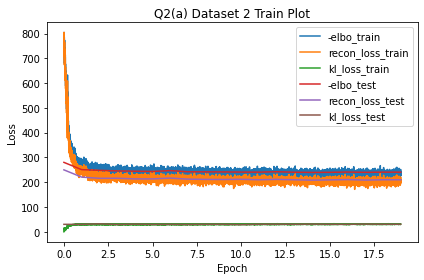

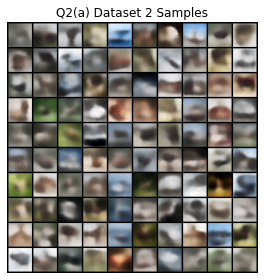

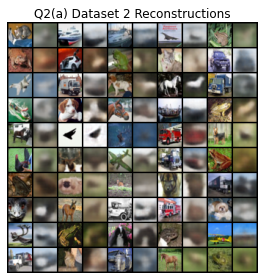

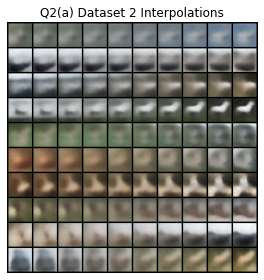

CPU times: user 2min 43s, sys: 1min 6s, total: 3min 50s
Wall time: 3min 57s


In [ ]:
%%time

q2_save_results('a', 2, q2_a)

## Part (b) VAE with AF Prior [20pts]
In this part, implement a VAE with an Autoregressive Flow prior ([VLAE](https://arxiv.org/abs/1611.02731)) with the following characteristics:

*   16-dim latent variables $z$ with a MADE prior, with $\epsilon \sim N(0, I)$
*   An approximate posterior $q_\theta(z|x) = N(z; \mu_\theta(x), \Sigma_\theta(x))$, where $\mu_\theta(x)$ is the mean vector, and $\Sigma_\theta(x)$ is a diagonal covariance matrix
*   A decoder $p(x|z) = N(x; \mu_\phi(z), I)$, where $\mu_\phi(z)$ is the mean vector. (We are not learning the covariance of the decoder)

You can use the same encoder / decoder architectures and training hyperparameters as part (a). For your MADE prior, it would suffice to use two hidden layers of size $512$. More explicitly, your MADE AF (mapping from $z\rightarrow \epsilon$) should output location $\mu_\psi(z)$ and scale parameters $\sigma_\psi(z)$ and do the following transformation on $z$:
$$\epsilon = z \odot \sigma_\psi(z) + \mu_\psi(z)$$

where the $i$th element of $\sigma_\psi(z)$ is computed from $z_{<i}$ (same for $\mu_\psi(z)$) and optimize the objective

$$-E_{z\sim q(z|x)}[\log{p(x|z)}] + E_{z\sim q(z|x)}[\log{q(z|x)} - \log{p(z)}]$$
where $$\log{p(z)} = \log{p(\epsilon)} + \log{\det\left|\frac{d\epsilon}{dz}\right|}$$





**You will provide the following deliverables**


1.   Over the course of training, record the average full negative ELBO, reconstruction loss, and KL term of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. 
2.   Report the final test set performance of your final model
3. 100 samples from your trained VAE
4. 50 real-image / reconstruction pairs (for some $x$, encode and then decode)
5. Interpolations of length 10 between 10 pairs of test images from your VAE (100 images total)




### Solution
Fill out the function below and return the neccessary arguments. Feel free to create more cells if need be

In [ ]:
# For debugging purpose

# data_dir = get_data_dir(3)
# train_data, test_data = load_pickled_data(join(data_dir, 'svhn.pkl'))
# train_data = (np.transpose(train_data, (0, 3, 1, 2)) / 255.).astype('float32')
# test_data = (np.transpose(test_data, (0, 3, 1, 2)) / 255.).astype('float32')
# train_loader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True)
# test_loader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=False)

In [ ]:
class MaskedLinear(nn.Linear):
    def __init__(self, in_features, out_features, bias=True):
        super().__init__(in_features, out_features, bias)
        self.register_buffer("mask", torch.ones(out_features, in_features))
        
    def set_mask(self, mask):
        self.mask.data.copy_(torch.from_numpy(mask.astype(np.uint8).T))

    def forward(self, x):
        return F.linear(x, self.mask * self.weight, self.bias)

class MADE(nn.Module):
    def __init__(self, input_shape, d, hidden_sizes, ordering=None):
        super().__init__()
        self.input_shape = input_shape
        self.nin = np.prod(input_shape)
        self.d = d
        self.nout = self.nin * d
        self.hidden_sizes = hidden_sizes
        self.ordering = np.arange(self.nin) if ordering is None else ordering

        self.net = []
        hs = [self.nin] + self.hidden_sizes + [self.nout]
        for i in range(len(hs) - 1):
            self.net.extend([MaskedLinear(hs[i], hs[i + 1]), nn.ReLU()])
        self.net.pop()
        self.net = nn.Sequential(*self.net)
        
        self.m = {}
        self.update_mask()
    
    def update_mask(self):
        n_hiddens = len(self.hidden_sizes)
        self.m[-1] = self.ordering
        for l in range(n_hiddens):
            self.m[l] = np.random.randint(
                self.m[l - 1].min(), self.nin - 1, size=self.hidden_sizes[l]
            )
        masks = [self.m[l - 1][:, None] <= self.m[l][None, :] for l in range(n_hiddens)]
        masks.append(self.m[n_hiddens - 1][:, None] < self.m[-1][None, :])
        masks[-1] = np.repeat(masks[-1], self.d, axis=1)
        layers = [l for l in self.net.modules() if isinstance(l, MaskedLinear)]
        for l, m in zip(layers, masks):
            l.set_mask(m)

    def forward(self, x):
        batch_size = x.shape[0]
        x = x.view(batch_size, self.nin)
        out = self.net(x).view(batch_size, self.nin, self.d)
        return out

class AfVAE(nn.Module):
    def __init__(self, input_shape, latent_dim):
        super().__init__()
        assert len(input_shape) == 3
        self.latent_dim = latent_dim
        self.made = MADE(latent_dim, 2, hidden_sizes=[512, 512])
        self.encoder = ConvEncoder(input_shape, latent_dim)
        self.decoder = ConvDecoder(latent_dim, input_shape)

    def loss(self, x):
        x = 2 * x - 1
        mu_z, log_std_z = self.encoder(x)
        z = torch.randn_like(mu_z) * log_std_z.exp() + mu_z
        x_recon = self.decoder(z)
        recon_loss = F.mse_loss(x_recon, x, reduction="none").view(x.shape[0], -1).sum(1).mean()
        enc_log_prob = -0.5 * np.log(2 * np.pi) - log_std_z \
            - 0.5 * (z - mu_z) ** 2 * torch.exp(-2 * log_std_z)
        out = self.made(z)
        mu, log_std = out.chunk(2, dim=-1)
        log_std = torch.tanh(log_std)
        mu, log_std = mu.squeeze(-1), log_std.squeeze(-1)
        eps = z * torch.exp(log_std) + mu
        prior_log_prob = -0.5 * np.log(2 * np.pi) + log_std - 0.5 * eps ** 2
        kl_loss = (enc_log_prob - prior_log_prob).sum(1).mean()
        return OrderedDict(loss=recon_loss + kl_loss, recon_loss=recon_loss, kl_loss=kl_loss)

    def sample(self, n):
        with torch.no_grad():
            z = torch.randn(n, self.latent_dim).to(device)
            for i in range(self.latent_dim):
                mu, log_std = self.made(z)[:, i].chunk(2, dim=-1)
                log_std = torch.tanh(log_std)
                mu, log_std = mu.squeeze(-1), log_std.squeeze(-1)
                z[:, i] = (z[:, i] - mu) * torch.exp(-log_std)
            return self.decoder(z).cpu().permute(0, 2, 3, 1).numpy() * 0.5 + 0.5


# For debugging purpose

# model = AfVAE(tuple(train_data.shape[1:]), 16).to(device)
# for x in train_loader:
#     x = x.to(device).float()
#     print(x.shape)
#     with torch.no_grad():
#         print(model.loss(x))
#     break
# print(model.sample(10).shape)

In [ ]:
def q2_b(train_data, test_data, dset_id):
    """
    train_data: An (n_train, 32, 32, 3) uint8 numpy array of color images with values in {0, ..., 255}
    test_data: An (n_test, 32, 32, 3) uint8 numpy array of color images with values in {0, ..., 255}
    dset_id: An identifying number of which dataset is given (1 or 2). Most likely
               used to set different hyperparameters for different datasets

    Returns
    - a (# of training iterations, 3) numpy array of full negative ELBO, reconstruction loss E[-log p(x|z)],
      and KL term E[KL(q(z|x) | p(z))] evaluated every minibatch
    - a (# of epochs + 1, 3) numpy array of full negative ELBO, reconstruciton loss E[-p(x|z)],
      and KL term E[KL(q(z|x) | p(z))] evaluated once at initialization and after each epoch
    - a (100, 32, 32, 3) numpy array of 100 samples from your VAE with values in {0, ..., 255}
    - a (100, 32, 32, 3) numpy array of 50 real image / reconstruction pairs
      FROM THE TEST SET with values in {0, ..., 255}
    - a (100, 32, 32, 3) numpy array of 10 interpolations of length 10 between
      pairs of test images. The output should be those 100 images flattened into
      the specified shape with values in {0, ..., 255}
    """

    """ YOUR CODE HERE """
    train_data = (np.transpose(train_data, (0, 3, 1, 2)) / 255.).astype('float32')
    test_data = (np.transpose(test_data, (0, 3, 1, 2)) / 255.).astype('float32')
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=False)

    input_shape = tuple(train_data.shape[1:])
    model = AfVAE(input_shape, 16).to(device)
    train_losses, test_losses = train(
        model, train_loader, test_loader, dict(n_epochs=20, lr=1e-3), print_every=1
    )
    train_losses = np.stack(
        (train_losses["loss"], train_losses["recon_loss"], train_losses["kl_loss"]), axis=1
    )
    test_losses = np.stack(
        (test_losses["loss"], test_losses["recon_loss"], test_losses["kl_loss"]), axis=1
    )
    samples = model.sample(100) * 255

    x = next(iter(test_loader))[:50].to(device)
    with torch.no_grad():
        x = 2 * x - 1
        z, _ = model.encoder(x)
        x_recon = torch.clamp(model.decoder(z), -1, 1)
        recons = torch.stack((x, x_recon), dim=1).view(-1, *input_shape) * 0.5 + 0.5
        recons = recons.permute(0, 2, 3, 1).cpu().numpy() * 255

    x = next(iter(test_loader))[:20].to(device)
    with torch.no_grad():
        x = 2 * x - 1
        z, _ = model.encoder(x)
        z1, z2 = z.chunk(2, dim=0)
        interps = [model.decoder(z1 * (1 - a) + z2 * a) for a in np.linspace(0, 1, 10)]
        interps = torch.stack(interps, dim=1).view(-1, *input_shape)
        interps = torch.clamp(interps, -1, 1) * 0.5 + 0.5
        interps = interps.permute(0, 2, 3, 1).cpu().numpy() * 255
    return train_losses, test_losses, samples, recons, interps

### Results
Once you've finished `q2_b`, execute the cells below to visualize and save your results.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Epoch 1, time elapsed 0.048 min
Train loss: loss 399.4307, recon_loss 392.7159, kl_loss 6.7147
Test loss: loss 366.9466, recon_loss 361.2864, kl_loss 5.6602


Epoch 2, time elapsed 0.095 min
Train loss: loss 249.5269, recon_loss 244.1823, kl_loss 5.3446
Test loss: loss 227.2818, recon_loss 218.1090, kl_loss 9.1727


Epoch 3, time elapsed 0.140 min
Train loss: loss 178.7137, recon_loss 170.4229, kl_loss 8.2908
Test loss: loss 176.1680, recon_loss 165.5647, kl_loss 10.6033


Epoch 4, time elapsed 0.186 min
Train loss: loss 151.7767, recon_loss 140.5076, kl_loss 11.2690
Test loss: loss 150.1231, recon_loss 136.1097, kl_loss 14.0134


Epoch 5, time elapsed 0.233 min
Train loss: loss 134.7988, recon_loss 121.3848, kl_loss 13.4140
Test loss: loss 148.6001, recon_loss 132.4864, kl_loss 16.1137


Epoch 6, time elapsed 0.279 min
Train loss: loss 123.0218, recon_loss 106.9632, kl_loss 16.0586
Test loss: loss 132.7218, recon_loss 114.3433, kl_loss 18.3784


Epoch 7, time elapsed 0.326 min
Train loss: loss 115.5605, recon_loss 98.3045, kl_loss 17.2560
Test loss: loss 128.6205, recon_loss 110.0779, kl_loss 18.5426


Epoch 8, time elapsed 0.372 min
Train loss: loss 111.4037, recon_loss 93.0114, kl_loss 18.3923
Test loss: loss 127.6944, recon_loss 107.9786, kl_loss 19.7157


Epoch 9, time elapsed 0.418 min
Train loss: loss 105.6461, recon_loss 85.7647, kl_loss 19.8814
Test loss: loss 110.7978, recon_loss 89.3156, kl_loss 21.4822


Epoch 10, time elapsed 0.464 min
Train loss: loss 101.8228, recon_loss 81.2586, kl_loss 20.5643
Test loss: loss 109.1825, recon_loss 87.9529, kl_loss 21.2296


Epoch 11, time elapsed 0.510 min
Train loss: loss 99.7403, recon_loss 78.9746, kl_loss 20.7658
Test loss: loss 107.8521, recon_loss 86.0635, kl_loss 21.7886


Epoch 12, time elapsed 0.555 min
Train loss: loss 98.9582, recon_loss 78.1381, kl_loss 20.8201
Test loss: loss 107.6306, recon_loss 84.0109, kl_loss 23.6198


Epoch 13, time elapsed 0.602 min
Train loss: loss 97.6693, recon_loss 76.6025, kl_loss 21.0668
Test loss: loss 105.7274, recon_loss 82.4613, kl_loss 23.2661


Epoch 14, time elapsed 0.648 min
Train loss: loss 96.9664, recon_loss 75.7917, kl_loss 21.1747
Test loss: loss 109.6945, recon_loss 86.9296, kl_loss 22.7649


Epoch 15, time elapsed 0.694 min
Train loss: loss 96.9103, recon_loss 75.6272, kl_loss 21.2830
Test loss: loss 103.8212, recon_loss 81.1475, kl_loss 22.6738


Epoch 16, time elapsed 0.739 min
Train loss: loss 95.3396, recon_loss 73.8826, kl_loss 21.4570
Test loss: loss 103.7867, recon_loss 81.2779, kl_loss 22.5088


Epoch 17, time elapsed 0.785 min
Train loss: loss 95.1699, recon_loss 73.6348, kl_loss 21.5351
Test loss: loss 103.9336, recon_loss 81.1061, kl_loss 22.8275


Epoch 18, time elapsed 0.831 min
Train loss: loss 94.0295, recon_loss 72.3669, kl_loss 21.6626
Test loss: loss 103.2587, recon_loss 80.3729, kl_loss 22.8858


Epoch 19, time elapsed 0.877 min
Train loss: loss 93.1165, recon_loss 71.4499, kl_loss 21.6666
Test loss: loss 103.8170, recon_loss 80.3141, kl_loss 23.5029


Epoch 20, time elapsed 0.923 min
Train loss: loss 92.2331, recon_loss 70.5408, kl_loss 21.6923
Test loss: loss 101.9229, recon_loss 78.4519, kl_loss 23.4709
Final -ELBO: 101.9229, Recon Loss: 78.4519, KL Loss: 23.4709


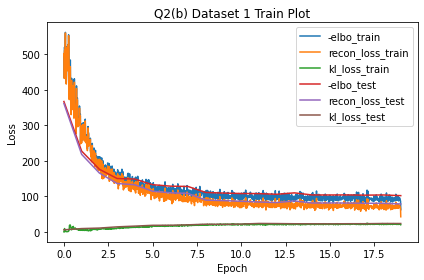

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


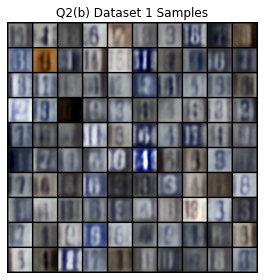

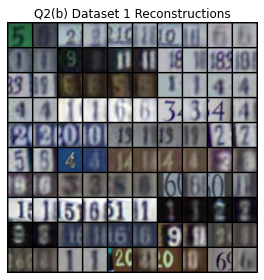

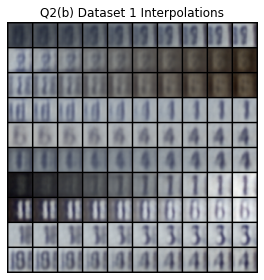

CPU times: user 40.6 s, sys: 14.7 s, total: 55.3 s
Wall time: 56.6 s


In [ ]:
%%time

q2_save_results('b', 1, q2_b)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Epoch 1, time elapsed 0.202 min
Train loss: loss 381.1061, recon_loss 361.9575, kl_loss 19.1487
Test loss: loss 271.0659, recon_loss 241.7791, kl_loss 29.2868


Epoch 2, time elapsed 0.403 min
Train loss: loss 251.2185, recon_loss 222.5811, kl_loss 28.6375
Test loss: loss 246.7085, recon_loss 218.4851, kl_loss 28.2234


Epoch 3, time elapsed 0.603 min
Train loss: loss 245.0242, recon_loss 216.3796, kl_loss 28.6446
Test loss: loss 245.6787, recon_loss 216.5339, kl_loss 29.1448


Epoch 4, time elapsed 0.803 min
Train loss: loss 242.9395, recon_loss 214.2855, kl_loss 28.6540
Test loss: loss 244.1103, recon_loss 214.8708, kl_loss 29.2395


Epoch 5, time elapsed 1.003 min
Train loss: loss 241.4665, recon_loss 212.7680, kl_loss 28.6985
Test loss: loss 242.5733, recon_loss 213.5331, kl_loss 29.0402


Epoch 6, time elapsed 1.203 min
Train loss: loss 239.9066, recon_loss 211.1888, kl_loss 28.7178
Test loss: loss 240.6960, recon_loss 212.7094, kl_loss 27.9866


Epoch 7, time elapsed 1.404 min
Train loss: loss 238.9796, recon_loss 210.2284, kl_loss 28.7513
Test loss: loss 240.7287, recon_loss 211.5721, kl_loss 29.1566


Epoch 8, time elapsed 1.605 min
Train loss: loss 237.8764, recon_loss 209.0726, kl_loss 28.8038
Test loss: loss 240.1317, recon_loss 210.7750, kl_loss 29.3568


Epoch 9, time elapsed 1.805 min
Train loss: loss 236.8675, recon_loss 207.9852, kl_loss 28.8823
Test loss: loss 239.2964, recon_loss 210.0782, kl_loss 29.2182


Epoch 10, time elapsed 2.008 min
Train loss: loss 236.2579, recon_loss 207.3551, kl_loss 28.9027
Test loss: loss 239.5593, recon_loss 210.4636, kl_loss 29.0957


Epoch 11, time elapsed 2.209 min
Train loss: loss 235.3564, recon_loss 206.3865, kl_loss 28.9699
Test loss: loss 239.0009, recon_loss 209.7426, kl_loss 29.2584


Epoch 12, time elapsed 2.408 min
Train loss: loss 234.6065, recon_loss 205.6081, kl_loss 28.9984
Test loss: loss 240.5206, recon_loss 211.4649, kl_loss 29.0557


Epoch 13, time elapsed 2.608 min
Train loss: loss 233.9656, recon_loss 204.9260, kl_loss 29.0397
Test loss: loss 239.2522, recon_loss 209.9345, kl_loss 29.3177


Epoch 14, time elapsed 2.809 min
Train loss: loss 233.5865, recon_loss 204.5101, kl_loss 29.0764
Test loss: loss 240.3120, recon_loss 211.2407, kl_loss 29.0712


Epoch 15, time elapsed 3.010 min
Train loss: loss 232.8327, recon_loss 203.7015, kl_loss 29.1312
Test loss: loss 238.3153, recon_loss 209.0790, kl_loss 29.2363


Epoch 16, time elapsed 3.210 min
Train loss: loss 232.4411, recon_loss 203.3053, kl_loss 29.1358
Test loss: loss 238.9525, recon_loss 209.7066, kl_loss 29.2460


Epoch 17, time elapsed 3.409 min
Train loss: loss 231.8658, recon_loss 202.6772, kl_loss 29.1886
Test loss: loss 238.4508, recon_loss 209.3457, kl_loss 29.1051


Epoch 18, time elapsed 3.609 min
Train loss: loss 231.3791, recon_loss 202.1522, kl_loss 29.2269
Test loss: loss 238.8424, recon_loss 209.7218, kl_loss 29.1206


Epoch 19, time elapsed 3.810 min
Train loss: loss 231.0338, recon_loss 201.7583, kl_loss 29.2755
Test loss: loss 238.1377, recon_loss 208.6860, kl_loss 29.4517


Epoch 20, time elapsed 4.013 min
Train loss: loss 230.4890, recon_loss 201.1798, kl_loss 29.3092
Test loss: loss 238.1026, recon_loss 209.2543, kl_loss 28.8483
Final -ELBO: 238.1026, Recon Loss: 209.2543, KL Loss: 28.8483


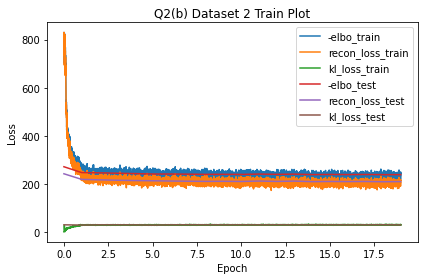

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


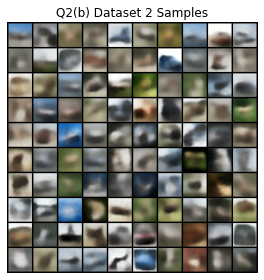

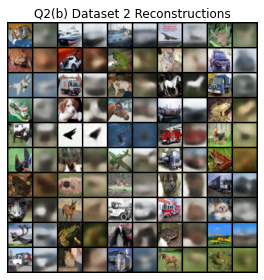

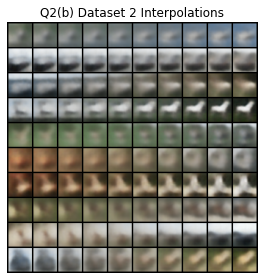

CPU times: user 2min 51s, sys: 1min 2s, total: 3min 54s
Wall time: 4min 2s


In [ ]:
%%time

q2_save_results('b', 2, q2_b)

# Question 3: VQ-VAE [40pts]
In this question, you with train a [VQ-VAE](https://arxiv.org/abs/1711.00937) on the colored shapes dataset and SVHN. If you are confused on how the VQ-VAE works, you may find [Lilian Weng's blogpost](https://lilianweng.github.io/lil-log/2018/08/12/from-autoencoder-to-beta-vae.html#vq-vae-and-vq-vae-2) to be useful.

You may experiment with different hyperparameters and architecture designs, but the following designs for the VQ-VAE architecture may be useful.

```
conv2d(in_channels, out_channels, kernel_size, stride, padding)
transpose_conv2d(in_channels, out_channels, kernel_size, stride, padding)
linear(in_dim, out_dim)
batch_norm2d(dim)

residual_block(dim)
    batch_norm2d(dim)
    relu()
    conv2d(dim, dim, 3, 1, 1)
    batch_norm2d(dim)
    relu()
    conv2d(dim, dim, 1, 1, 0)

Encoder
    conv2d(3, 256, 4, 2, 1) 16 x 16
    batch_norm2d(256)
    relu()
    conv2d(256, 256, 4, 2, 1) 8 x 8
    residual_block(256)
    residual_block(256)

Decoder
    residual_block(256)
    residual_block(256)
    batch_norm2d(256)
    relu()
    transpose_conv2d(256, 256, 4, 2, 1) 16 x 16
    batch_norm2d(256)
    relu()
    transpose_conv2d(256, 3, 4, 2, 1) 32 x 32
```

A few other tips:
*   Use a codebook with $K = 128$ latents each with a $D = 256$ dimensional embedding vector
*   You should initialize each element in your $K\times D$ codebook to be uniformly random in $[-1/K, 1/K]$
*   Use batch size 128 with a learning rate of $10^{-3}$ and an Adam optimizer
*   Center and scale your images to $[-1, 1]$
*   Supposing that $z_e(x)$ is the encoder output, and $z_q(x)$ is the quantized output using the codebook, you can implement the straight-through estimator as follows (where below is fed into the decoder): 
  * `(z_q(x) - z_e(x)).detach() + z_e(x)` in Pytorch
  * `tf.stop_gradient(z_q(x) - z_e(x)) + z_e(x)` in Tensorflow.

In addition to training the VQ-VAE, you will also need to train a PixelCNN prior on the categorical latents in order to sample. For your architecture, you may find the following useful:
*   Since the input is a 2D grid of discrete values, you should have an input (learned) embedding layer to map the discrete values to embeddings of length $64$
*   Use a single Type A masked convolutions followed by 10-15 residual blocks (same structure as HW 1), and $2$ $1\times 1$ convolutions of $512$ and $K$ channels respectively.
*   You may find normalization methods (e.g. BatchNorm, LayerNorm) to be useful
*   Use batch size 128 with a learning rate of $10^{-3}$ and an Adam optimizer

**You will provide the following deliverables**


1.   Over the course of training, record the average loss of the training data (per minibatch) and test data (for your entire test set) **for both your VQ-VAE and PixelCNN prior**. Code is provided that automatically plots the training curves. 
2. Report the final test set performances of your final models
3. 100 samples from your trained VQ-VAE and PixelCNN prior
4. 50 real-image / reconstruction pairs (for some $x$, encode and then decode)

## Solution
Fill out the function below and return the neccessary arguments. Feel free to create more cells if need be

In [ ]:
# For debugging purpose

# data_dir = get_data_dir(3)
# train_data, test_data = load_pickled_data(join(data_dir, 'svhn.pkl'))
# train_data = (np.transpose(train_data, (0, 3, 1, 2)) / 255.).astype('float32')
# test_data = (np.transpose(test_data, (0, 3, 1, 2)) / 255.).astype('float32')
# train_loader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True)
# test_loader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=False)

In [ ]:
class LayerNorm(nn.LayerNorm):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
    
    def forward(self, x):
        x = x.permute(0, 2, 3, 1).contiguous()
        x = super().forward(x)
        return x.permute(0, 3, 1, 2).contiguous()

class MaskConv2d(nn.Conv2d):
    def __init__(
        self, mask_type, *args, conditional_size=None, color_conditioning=False, **kwargs
    ):
        assert mask_type == "A" or mask_type == "B"
        super().__init__(*args, **kwargs)
        self.conditional_size = conditional_size
        self.register_buffer("mask", torch.zeros_like(self.weight))
        self.create_mask(mask_type)
        if self.conditional_size is not None:
            if len(self.conditional_size) == 1:
                self.cond_op = nn.Linear(conditional_size[0], self.out_channels)
            else:
                self.cond_op = nn.Conv2d(
                    conditional_size[0], self.out_channels, kernel_size=3, padding=1
                )

    def create_mask(self, mask_type):
        k = self.kernel_size
        self.mask[:, :, :k[0] // 2] = 1
        self.mask[:, :, k[0] // 2, :k[1] // 2] = 1
        if mask_type == "B":
            self.mask[:, :, k[0] // 2, k[1] // 2] = 1

    def forward(self, x, cond=None):
        batch_size = x.shape[0]
        out = F.conv2d(
            input=x, 
            weight=self.mask * self.weight, 
            bias=self.bias, 
            stride=self.stride,
            padding=self.padding,
            dilation=self.dilation,
            groups=self.groups,
        )
        if self.conditional_size is not None:
            if len(self.conditional_size) == 1:
                out = out + self.cond_op(cond).view(batch_size, -1, 1, 1)
            else:
                out = out + self.cond_op(cond)
        return out

class PixelCnnResBlock(nn.Module):
    def __init__(self, dim, kernel_size, **kwargs):
        super().__init__()
        self.block = nn.ModuleList([
            LayerNorm(dim),
            nn.ReLU(),
            MaskConv2d("B", dim, dim // 2, 1, **kwargs),
            LayerNorm(dim // 2),
            nn.ReLU(),
            MaskConv2d(
                "B", dim // 2, dim // 2, kernel_size, padding=kernel_size // 2, **kwargs
            ),
            LayerNorm(dim // 2),
            nn.ReLU(),
            MaskConv2d("B", dim // 2, dim, 1, **kwargs),
        ])

    def forward(self, x, cond=None):
        out = x
        for layer in self.block:
            if isinstance(layer, MaskConv2d):
                out = layer(out, cond=cond)
            else:
                out = layer(out)
        return out + x

class PixelCnnPrior(nn.Module):
    # Prior
    def __init__(
        self, input_shape, code_size, dim, n_layers, conditional_size=None
    ):
        super().__init__()
        assert len(input_shape) == 2
        kwargs = dict(conditional_size=conditional_size)
        self.embedding = nn.Embedding(code_size, dim)
        model = nn.ModuleList([
            MaskConv2d("A", dim, dim, kernel_size=7, padding=3, **kwargs),
            LayerNorm(dim),
            nn.ReLU(),
        ])

        for _ in range(n_layers - 1):
            model.append(PixelCnnResBlock(dim, 3, **kwargs))
        model.extend([
            LayerNorm(dim), 
            nn.ReLU(), 
            MaskConv2d("B", dim, 512, 1, **kwargs),
            nn.ReLU(),
            MaskConv2d("B", 512, code_size, 1, **kwargs)
        ])      
        
        self.net = model
        self.input_shape = input_shape

    def forward(self, x, cond=None):
        out = self.embedding(x).permute(0, 3, 1, 2).contiguous()
        for layer in self.net:
            if isinstance(layer, MaskConv2d) or isinstance(layer, PixelCnnResBlock):
                out = layer(out, cond=cond)
            else:
                out = layer(out)
        return out

    def loss(self, x, cond=None):
        return OrderedDict(loss=F.cross_entropy(self(x, cond=cond), x.long()))

    def sample(self, n, cond=None, device=device):
        samples = torch.zeros(n, *self.input_shape).long().to(device)
        with torch.no_grad():
            for r in range(self.input_shape[0]):
                for c in range(self.input_shape[1]):
                    logits = self(samples, cond=cond)[:, :, r, c]
                    probs = F.softmax(logits, dim=1)
                    samples[:, r, c] = torch.multinomial(probs, 1).squeeze(-1)
        return samples

class ResBlock(nn.Module):
    def __init__(self, dim, kernel_size=3):
        super().__init__()
        self.net = nn.Sequential(
            nn.BatchNorm2d(dim),
            nn.ReLU(),
            nn.Conv2d(dim, dim, kernel_size, padding=kernel_size // 2),
            nn.BatchNorm2d(dim),
            nn.ReLU(),
            nn.Conv2d(dim, dim, 1),
        )

    def forward(self, x):
        return x + self.net(x)

class Quantize(nn.Module):
    def __init__(self, code_size, code_dim):
        super().__init__()
        self.embedding = nn.Embedding(code_size, code_dim)
        self.embedding.weight.data.uniform_(-1. / code_size, 1. / code_size)
        self.code_dim = code_dim

    def forward(self, z):
        b, c, h, w = z.shape
        weight = self.embedding.weight
        z_flat = z.permute(0, 2, 3, 1).reshape(-1, self.code_dim)
        dist = (
            (z_flat ** 2).sum(dim=1, keepdim=True)
            - 2 * torch.mm(z_flat, weight.T)
            + (weight.T ** 2).sum(dim=0, keepdim=True)
        )
        encoding_indices = torch.max(-dist, dim=1)[1].view(b, h, w)
        quantized = self.embedding(encoding_indices).permute(0, 3, 1, 2)
        return quantized, (quantized - z).detach() + z, encoding_indices

class VectorQuantizedVAE(nn.Module):
    def __init__(self, code_size, code_dim):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 256, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(256, 256, 4, stride=2, padding=1),
            ResBlock(256),
            ResBlock(256),
        )
        self.codebook = Quantize(code_size, code_dim)
        self.decoder = nn.Sequential(
            ResBlock(256),
            ResBlock(256),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.ConvTranspose2d(256, 256, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256), 
            nn.ConvTranspose2d(256, 3, 4, stride=2, padding=1),
            nn.Tanh(),
        )

    def encode_code(self, x):
        with torch.no_grad():
            x = 2 * x - 1
            z = self.encoder(x)
            indices = self.codebook(z)[2]
            return indices

    def decode_code(self, z):
        with torch.no_grad():
            z = self.codebook.embedding(z).permute(0, 3, 1, 2)
            return self.decoder(z).permute(0, 2, 3, 1).cpu().numpy() * 0.5 + 0.5
    
    def forward(self, x):
        z = self.encoder(x)
        e, e_sg, _ = self.codebook(z)
        x_recon = self.decoder(e_sg)
        diff1 = torch.mean((z - e.detach()) ** 2)
        diff2 = torch.mean((e - z.detach()) ** 2)
        return x_recon, diff1 + diff2
        
    def loss(self, x):
        x = 2 * x - 1
        x_recon, diff = self(x)
        recon_loss = F.mse_loss(x_recon, x)
        return OrderedDict(
            loss=recon_loss + diff, recon_loss=recon_loss, reg_loss=diff
        )


# For debugging purpose

# prior = PixelCnnPrior(input_shape=(8, 8), code_size=128, code_dim=256, n_layers=7).to(device)
# print(prior.sample(5).shape)
# model = VectorQuantizedVAE(code_size=128, code_dim=256).to(device)
# for x in train_loader:
#     x = x.to(device)
#     print(x.shape)
#     with torch.no_grad():
#         print(model.loss(x))
#     break

In [ ]:
def q3(train_data, test_data, dset_id):
    """
    train_data: An (n_train, 32, 32, 3) uint8 numpy array of color images with values in [0, 255]
    test_data: An (n_test, 32, 32, 3) uint8 numpy array of color images with values in [0, 255]
    dset_id: An identifying number of which dataset is given (1 or 2). Most likely
               used to set different hyperparameters for different datasets

    Returns
    - a (# of training iterations,) numpy array of VQ-VAE train losess evaluated every minibatch
    - a (# of epochs + 1,) numpy array of VQ-VAE train losses evaluated once at initialization and after each epoch
    - a (# of training iterations,) numpy array of PixelCNN prior train losess evaluated every minibatch
    - a (# of epochs + 1,) numpy array of PixelCNN prior train losses evaluated once at initialization and after each epoch
    - a (100, 32, 32, 3) numpy array of 100 samples with values in {0, ... 255}
    - a (100, 32, 32, 3) numpy array of 50 real image / reconstruction pairs
      FROM THE TEST SET with values in [0, 255]
    """

    """ YOUR CODE HERE """
    train_data = (np.transpose(train_data, (0, 3, 1, 2)) / 255.).astype('float32')
    test_data = (np.transpose(test_data, (0, 3, 1, 2)) / 255.).astype('float32')
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=False)
    input_shape = tuple(train_data.shape[1:])

    code_size=128
    code_dim=256
    model = VectorQuantizedVAE(code_size=code_size, code_dim=code_dim).to(device)
    train_losses, test_losses = train(
        model, train_loader, test_loader, dict(n_epochs=20, lr=1e-3), print_every=1
    )
    train_losses = train_losses["loss"]
    test_losses = test_losses["loss"]

    def create_prior_dataset(data_loader):
        prior_data = []
        with torch.no_grad():
            for x in data_loader:
                x = x.to(device)
                z = model.encode_code(x)
                prior_data.append(z.long().cpu())
        return torch.cat(prior_data, dim=0)
    prior_input_shape = (input_shape[1] // 4, input_shape[2] // 4)
    prior = PixelCnnPrior(
        input_shape=prior_input_shape, code_size=code_size, dim=128, n_layers=10
    ).to(device)
    prior_train_data = create_prior_dataset(train_loader)
    prior_test_data = create_prior_dataset(test_loader)
    prior_train_loader = torch.utils.data.DataLoader(
        prior_train_data, batch_size=128, shuffle=True
    )
    prior_test_loader = torch.utils.data.DataLoader(
        prior_test_data, batch_size=128, shuffle=False
    )
    prior_train_losses, prior_test_losses = train(
        prior, 
        prior_train_loader, 
        prior_test_loader, 
        dict(n_epochs=15, lr=1e-3, grad_clip=1), 
        print_every=1
    )
    prior_train_losses = prior_train_losses["loss"]
    prior_test_losses = prior_test_losses["loss"]
    samples = prior.sample(100)
    samples = model.decode_code(samples) * 255

    x = next(iter(test_loader))[:50].to(device)
    with torch.no_grad():
        z = model.encode_code(x)
        x_recon = model.decode_code(z)
    x = x.cpu().permute(0, 2, 3, 1).numpy()
    recons = np.stack((x, x_recon), axis=1).reshape(
        (-1, input_shape[1], input_shape[2], input_shape[0])
    ) * 255
    return train_losses, test_losses, prior_train_losses, prior_test_losses, samples, recons

## Results
Once you've finished `q3`, execute the cells below to visualize and save your results.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Epoch 1, time elapsed 0.168 min
Train loss: loss 61.4003, recon_loss 0.1465, reg_loss 61.2537
Test loss: loss 8.4206, recon_loss 0.0555, reg_loss 8.3651


Epoch 2, time elapsed 0.335 min
Train loss: loss 2.4342, recon_loss 0.0374, reg_loss 2.3968
Test loss: loss 1.4265, recon_loss 0.0365, reg_loss 1.3901


Epoch 3, time elapsed 0.503 min
Train loss: loss 0.8115, recon_loss 0.0329, reg_loss 0.7785
Test loss: loss 1.2324, recon_loss 0.0552, reg_loss 1.1772


Epoch 4, time elapsed 0.670 min
Train loss: loss 0.7733, recon_loss 0.0343, reg_loss 0.7390
Test loss: loss 0.4765, recon_loss 0.0265, reg_loss 0.4500


Epoch 5, time elapsed 0.837 min
Train loss: loss 0.3343, recon_loss 0.0261, reg_loss 0.3082
Test loss: loss 0.5027, recon_loss 0.0697, reg_loss 0.4330


Epoch 6, time elapsed 1.004 min
Train loss: loss 0.5542, recon_loss 0.0380, reg_loss 0.5162
Test loss: loss 0.2814, recon_loss 0.0228, reg_loss 0.2585


Epoch 7, time elapsed 1.171 min
Train loss: loss 0.2141, recon_loss 0.0229, reg_loss 0.1912
Test loss: loss 0.2426, recon_loss 0.0245, reg_loss 0.2181


Epoch 8, time elapsed 1.339 min
Train loss: loss 0.1803, recon_loss 0.0227, reg_loss 0.1576
Test loss: loss 1.2274, recon_loss 0.1609, reg_loss 1.0665


Epoch 9, time elapsed 1.507 min
Train loss: loss 1.2111, recon_loss 0.0470, reg_loss 1.1641
Test loss: loss 0.2385, recon_loss 0.0245, reg_loss 0.2140


Epoch 10, time elapsed 1.675 min
Train loss: loss 0.1673, recon_loss 0.0215, reg_loss 0.1458
Test loss: loss 0.1658, recon_loss 0.0184, reg_loss 0.1474


Epoch 11, time elapsed 1.842 min
Train loss: loss 0.1368, recon_loss 0.0186, reg_loss 0.1182
Test loss: loss 0.1457, recon_loss 0.0171, reg_loss 0.1285


Epoch 12, time elapsed 2.010 min
Train loss: loss 0.1199, recon_loss 0.0170, reg_loss 0.1029
Test loss: loss 0.1379, recon_loss 0.0171, reg_loss 0.1208


Epoch 13, time elapsed 2.178 min
Train loss: loss 0.1125, recon_loss 0.0172, reg_loss 0.0952
Test loss: loss 0.1879, recon_loss 0.0348, reg_loss 0.1532


Epoch 14, time elapsed 2.346 min
Train loss: loss 0.1609, recon_loss 0.0204, reg_loss 0.1404
Test loss: loss 0.1201, recon_loss 0.0168, reg_loss 0.1033


Epoch 15, time elapsed 2.513 min
Train loss: loss 0.0945, recon_loss 0.0157, reg_loss 0.0788
Test loss: loss 0.0980, recon_loss 0.0146, reg_loss 0.0834


Epoch 16, time elapsed 2.681 min
Train loss: loss 0.0866, recon_loss 0.0146, reg_loss 0.0720
Test loss: loss 0.0923, recon_loss 0.0131, reg_loss 0.0792


Epoch 17, time elapsed 2.847 min
Train loss: loss 0.0805, recon_loss 0.0138, reg_loss 0.0666
Test loss: loss 0.0877, recon_loss 0.0129, reg_loss 0.0748


Epoch 18, time elapsed 3.015 min
Train loss: loss 0.0760, recon_loss 0.0133, reg_loss 0.0628
Test loss: loss 0.0872, recon_loss 0.0130, reg_loss 0.0742


Epoch 19, time elapsed 3.183 min
Train loss: loss 0.0713, recon_loss 0.0126, reg_loss 0.0587
Test loss: loss 0.0761, recon_loss 0.0114, reg_loss 0.0647


Epoch 20, time elapsed 3.350 min
Train loss: loss 0.1858, recon_loss 0.0197, reg_loss 0.1661
Test loss: loss 0.0947, recon_loss 0.0148, reg_loss 0.0800


Epoch 1, time elapsed 0.083 min
Train loss: loss 2.4055
Test loss: loss 1.9335


Epoch 2, time elapsed 0.165 min
Train loss: loss 1.8973
Test loss: loss 1.8723


Epoch 3, time elapsed 0.248 min
Train loss: loss 1.8372
Test loss: loss 1.8369


Epoch 4, time elapsed 0.330 min
Train loss: loss 1.7970
Test loss: loss 1.8524


Epoch 5, time elapsed 0.413 min
Train loss: loss 1.7637
Test loss: loss 1.8165


Epoch 6, time elapsed 0.495 min
Train loss: loss 1.7337
Test loss: loss 1.7977


Epoch 7, time elapsed 0.578 min
Train loss: loss 1.7034
Test loss: loss 1.7983


Epoch 8, time elapsed 0.660 min
Train loss: loss 1.6786
Test loss: loss 1.7980


Epoch 9, time elapsed 0.743 min
Train loss: loss 1.6523
Test loss: loss 1.8068


Epoch 10, time elapsed 0.826 min
Train loss: loss 1.6308
Test loss: loss 1.8009


Epoch 11, time elapsed 0.908 min
Train loss: loss 1.6097
Test loss: loss 1.8263


Epoch 12, time elapsed 0.991 min
Train loss: loss 1.5877
Test loss: loss 1.8190


Epoch 13, time elapsed 1.073 min
Train loss: loss 1.5656
Test loss: loss 1.8344


Epoch 14, time elapsed 1.155 min
Train loss: loss 1.5466
Test loss: loss 1.8617


Epoch 15, time elapsed 1.238 min
Train loss: loss 1.5264
Test loss: loss 1.8653
VQ-VAE Final Test Loss: 0.0947
PixelCNN Prior Final Test Loss: 1.8653


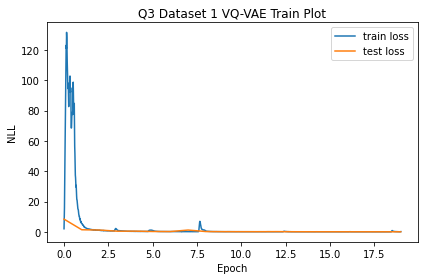

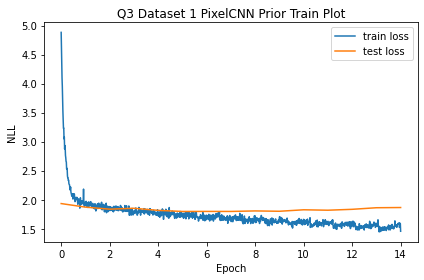

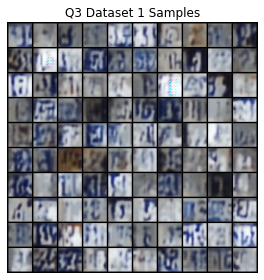

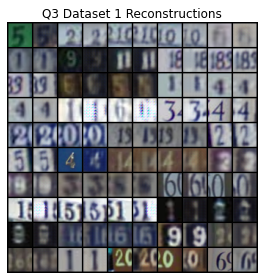

CPU times: user 3min 11s, sys: 1min 22s, total: 4min 33s
Wall time: 4min 41s


In [ ]:
%%time

q3_save_results(1, q3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Epoch 1, time elapsed 0.771 min
Train loss: loss 14.7118, recon_loss 0.0869, reg_loss 14.6248
Test loss: loss 0.4437, recon_loss 0.0513, reg_loss 0.3924


Epoch 2, time elapsed 1.541 min
Train loss: loss 0.2841, recon_loss 0.0440, reg_loss 0.2401
Test loss: loss 0.1883, recon_loss 0.0367, reg_loss 0.1516


Epoch 3, time elapsed 2.309 min
Train loss: loss 0.1560, recon_loss 0.0350, reg_loss 0.1210
Test loss: loss 0.1303, recon_loss 0.0324, reg_loss 0.0979


Epoch 4, time elapsed 3.076 min
Train loss: loss 0.1161, recon_loss 0.0308, reg_loss 0.0853
Test loss: loss 0.1039, recon_loss 0.0289, reg_loss 0.0750


Epoch 5, time elapsed 3.843 min
Train loss: loss 0.0999, recon_loss 0.0296, reg_loss 0.0703
Test loss: loss 0.0901, recon_loss 0.0274, reg_loss 0.0628


Epoch 6, time elapsed 4.610 min
Train loss: loss 0.0871, recon_loss 0.0281, reg_loss 0.0590
Test loss: loss 0.0811, recon_loss 0.0268, reg_loss 0.0543


Epoch 7, time elapsed 5.378 min
Train loss: loss 0.0797, recon_loss 0.0272, reg_loss 0.0525
Test loss: loss 0.0750, recon_loss 0.0262, reg_loss 0.0488


Epoch 8, time elapsed 6.145 min
Train loss: loss 0.0739, recon_loss 0.0264, reg_loss 0.0474
Test loss: loss 0.0710, recon_loss 0.0256, reg_loss 0.0454


Epoch 9, time elapsed 6.911 min
Train loss: loss 0.0704, recon_loss 0.0260, reg_loss 0.0444
Test loss: loss 0.0704, recon_loss 0.0259, reg_loss 0.0446


Epoch 10, time elapsed 7.677 min
Train loss: loss 0.0727, recon_loss 0.0262, reg_loss 0.0465
Test loss: loss 0.0727, recon_loss 0.0272, reg_loss 0.0454


Epoch 11, time elapsed 8.444 min
Train loss: loss 0.0732, recon_loss 0.0261, reg_loss 0.0470
Test loss: loss 0.0629, recon_loss 0.0248, reg_loss 0.0382


Epoch 12, time elapsed 9.213 min
Train loss: loss 0.4040, recon_loss 0.0364, reg_loss 0.3676
Test loss: loss 0.0998, recon_loss 0.0291, reg_loss 0.0708


Epoch 13, time elapsed 9.983 min
Train loss: loss 0.0753, recon_loss 0.0272, reg_loss 0.0481
Test loss: loss 0.0656, recon_loss 0.0253, reg_loss 0.0403


Epoch 14, time elapsed 10.750 min
Train loss: loss 0.0644, recon_loss 0.0257, reg_loss 0.0388
Test loss: loss 0.0613, recon_loss 0.0244, reg_loss 0.0369


Epoch 15, time elapsed 11.517 min
Train loss: loss 0.0614, recon_loss 0.0251, reg_loss 0.0362
Test loss: loss 0.0597, recon_loss 0.0241, reg_loss 0.0356


Epoch 16, time elapsed 12.281 min
Train loss: loss 0.0592, recon_loss 0.0245, reg_loss 0.0348
Test loss: loss 0.0574, recon_loss 0.0235, reg_loss 0.0339


Epoch 17, time elapsed 13.048 min
Train loss: loss 0.2403, recon_loss 0.0287, reg_loss 0.2116
Test loss: loss 0.0644, recon_loss 0.0243, reg_loss 0.0401


Epoch 18, time elapsed 13.814 min
Train loss: loss 0.0628, recon_loss 0.0247, reg_loss 0.0380
Test loss: loss 0.0594, recon_loss 0.0238, reg_loss 0.0356


Epoch 19, time elapsed 14.581 min
Train loss: loss 0.0600, recon_loss 0.0242, reg_loss 0.0357
Test loss: loss 0.0581, recon_loss 0.0235, reg_loss 0.0347


Epoch 20, time elapsed 15.347 min
Train loss: loss 0.1558, recon_loss 0.0271, reg_loss 0.1287
Test loss: loss 0.0600, recon_loss 0.0234, reg_loss 0.0366


Epoch 1, time elapsed 0.380 min
Train loss: loss 2.8970
Test loss: loss 2.7749


Epoch 2, time elapsed 0.755 min
Train loss: loss 2.7460
Test loss: loss 2.7392


Epoch 3, time elapsed 1.134 min
Train loss: loss 2.7170
Test loss: loss 2.7273


Epoch 4, time elapsed 1.514 min
Train loss: loss 2.6992
Test loss: loss 2.7169


Epoch 5, time elapsed 1.895 min
Train loss: loss 2.6849
Test loss: loss 2.7155


Epoch 6, time elapsed 2.275 min
Train loss: loss 2.6739
Test loss: loss 2.7138


Epoch 7, time elapsed 2.654 min
Train loss: loss 2.6641
Test loss: loss 2.7111


Epoch 8, time elapsed 3.033 min
Train loss: loss 2.6554
Test loss: loss 2.7139


Epoch 9, time elapsed 3.417 min
Train loss: loss 2.6469
Test loss: loss 2.7122


Epoch 10, time elapsed 3.804 min
Train loss: loss 2.6395
Test loss: loss 2.7165


Epoch 11, time elapsed 4.201 min
Train loss: loss 2.6325
Test loss: loss 2.7177


Epoch 12, time elapsed 4.586 min
Train loss: loss 2.6260
Test loss: loss 2.7186


Epoch 13, time elapsed 4.971 min
Train loss: loss 2.6193
Test loss: loss 2.7211


Epoch 14, time elapsed 5.354 min
Train loss: loss 2.6134
Test loss: loss 2.7253


Epoch 15, time elapsed 5.736 min
Train loss: loss 2.6075
Test loss: loss 2.7291
VQ-VAE Final Test Loss: 0.0600
PixelCNN Prior Final Test Loss: 2.7291


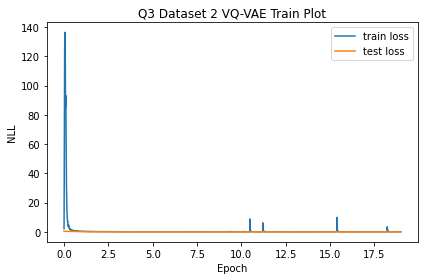

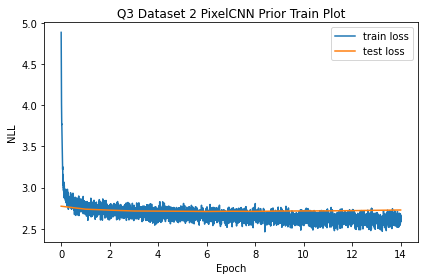

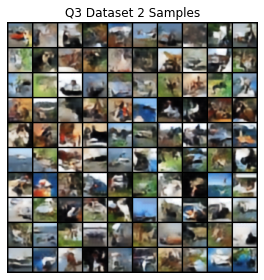

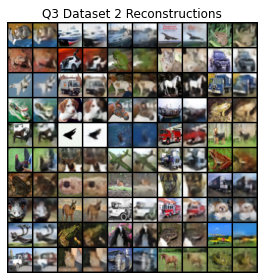

CPU times: user 14min 25s, sys: 6min 20s, total: 20min 46s
Wall time: 21min 12s


In [ ]:
%%time

q3_save_results(2, q3)

# Question 4 Bonus [15pts]

## Part (a) Improving VQ-VAE Results [10pts]
Improve upon your results in Q3, one option being trying to implement or train a stronger autoregressive model such as a Gated PixelCNN.

### Solution
Fill out the function below and return the neccessary arguments. Feel free to create more cells if need be

In [ ]:
class StackLayerNorm(nn.Module):
    def __init__(self, n_filters):
        super().__init__()
        self.h_layer_norm = LayerNorm(n_filters)
        self.v_layer_norm = LayerNorm(n_filters)

    def forward(self, x):
        vx, hx = x.chunk(2, dim=1)
        vx, hx = self.v_layer_norm(vx), self.h_layer_norm(hx)
        return torch.cat((vx, hx), dim=1)

class GatedConv2d(nn.Module):
    def __init__(self, mask_type, in_channels, out_channels, kernel_size=7, padding=3):
        assert mask_type == "A" or mask_type == "B"
        super().__init__()

        k = kernel_size
        self.vertical = nn.Conv2d(
            in_channels, 2 * out_channels, kernel_size=k, padding=padding, bias=False
        )
        self.horizontal = nn.Conv2d(
            in_channels, 2 * out_channels, kernel_size=(1, k), padding=(0, padding), bias=False
        )
        self.vtoh = nn.Conv2d(2 * out_channels, 2 * out_channels, kernel_size=1, bias=False)
        self.htoh = nn.Conv2d(out_channels, out_channels, kernel_size=1, bias=False)

        self.register_buffer("vmask", torch.zeros_like(self.vertical.weight))
        self.register_buffer("hmask", torch.zeros_like(self.horizontal.weight))

        self.vmask[:, :, :k // 2 + 1, :] = 1
        self.hmask[:, :, :, :k // 2] = 1
        if mask_type == "B":
            self.hmask[:, :, :, k // 2] = 1
    
    def down_shift(self, x):
        return F.pad(x[:, :, :-1, :], (0, 0, 1, 0))

    def forward(self, x):
        vx, hx = x.chunk(2, dim=1)

        self.vertical.weight.data *= self.vmask
        self.horizontal.weight.data *= self.hmask

        vx = self.vertical(vx)
        hx_res = self.horizontal(hx) + self.vtoh(self.down_shift(vx))

        # gates
        vx1, vx2 = vx.chunk(2, dim=1)
        vx = torch.tanh(vx1) * torch.sigmoid(vx2)

        hx1, hx2 = hx_res.chunk(2, dim=1)
        hx_res = self.htoh(torch.tanh(hx1) * torch.sigmoid(hx2))
        hx = hx + hx_res

        return torch.cat((vx, hx), dim=1)    

class GatedPixelCnnPrior(nn.Module):
    def __init__(self, input_shape, code_size, dim, n_layers):
        super().__init__()
        assert len(input_shape) == 2
        self.input_shape = input_shape

        self.embedding = nn.Embedding(code_size, dim)
        self.in_conv = MaskConv2d("A", dim, dim, 7, padding=3)
        model = []
        for _ in range(n_layers - 2):
            model.extend([
                nn.ReLU(), 
                StackLayerNorm(dim),
                GatedConv2d("B", dim, dim, 7, padding=3),
            ])
        model.extend([nn.ReLU(), StackLayerNorm(dim)])
        self.net = nn.Sequential(*model)
        self.out_conv = MaskConv2d("B", dim, code_size, 7, padding=3)  

    def forward(self, x):
        batch_size = x.shape[0]
        out = self.embedding(x).permute(0, 3, 1, 2).contiguous()
        out = self.in_conv(out)
        out = self.net(torch.cat((out, out), dim=1)).chunk(2, dim=1)[1]
        out = self.out_conv(out)
        return out

    def loss(self, x):
        return OrderedDict(loss=F.cross_entropy(self(x), x.long()))

    def sample(self, n, cond=None, device=device):
        samples = torch.zeros(n, *self.input_shape).long().to(device)
        with torch.no_grad():
            for r in range(self.input_shape[0]):
                for c in range(self.input_shape[1]):
                    logits = self(samples)[:, :, r, c]
                    probs = F.softmax(logits, dim=1)
                    samples[:, r, c] = torch.multinomial(probs, 1).squeeze(-1)
        return samples


# For debugging purpose

# prior = GatedPixelCnnPrior(input_shape=(8, 8), code_size=128, dim=128, n_layers=15).to(device)
# print(prior.sample(5).shape)

In [ ]:
def q4_a(train_data, test_data, dset_id):
    """
    train_data: An (n_train, 32, 32, 3) uint8 numpy array of color images with values in [0, 255]
    test_data: An (n_test, 32, 32, 3) uint8 numpy array of color images with values in [0, 255]
    dset_id: An identifying number of which dataset is given (1 or 2). Most likely
               used to set different hyperparameters for different datasets

    Returns
    - a (# of training iterations,) numpy array of VQ-VAE train losess evaluated every minibatch
    - a (# of epochs + 1,) numpy array of VQ-VAE train losses evaluated once at initialization and after each epoch
    - a (# of training iterations,) numpy array of PixelCNN prior train losess evaluated every minibatch
    - a (# of epochs + 1,) numpy array of PixelCNN prior train losses evaluated once at initialization and after each epoch
    - a (100, 32, 32, 3) numpy array of 100 samples with values in {0, ... 255}
    - a (100, 32, 32, 3) numpy array of 50 real image / reconstruction pairs
      FROM THE TEST SET with values in [0, 255]
    """

    """ YOUR CODE HERE """
    train_data = (np.transpose(train_data, (0, 3, 1, 2)) / 255.).astype('float32')
    test_data = (np.transpose(test_data, (0, 3, 1, 2)) / 255.).astype('float32')
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=False)
    input_shape = tuple(train_data.shape[1:])

    code_size=128
    code_dim=256
    model = VectorQuantizedVAE(code_size=code_size, code_dim=code_dim).to(device)
    train_losses, test_losses = train(
        model, 
        train_loader, 
        test_loader, 
        dict(n_epochs=10, lr=1e-3, grad_clip=1), 
        print_every=1,
    )
    train_losses = train_losses["loss"]
    test_losses = test_losses["loss"]

    def create_prior_dataset(data_loader):
        prior_data = []
        with torch.no_grad():
            for x in data_loader:
                x = x.to(device)
                z = model.encode_code(x)
                prior_data.append(z.long().cpu())
        return torch.cat(prior_data, dim=0)
    prior_input_shape = (input_shape[1] // 4, input_shape[2] // 4)
    prior = GatedPixelCnnPrior(
        input_shape=prior_input_shape, code_size=code_size, dim=128, n_layers=15
    ).to(device)
    prior_train_data = create_prior_dataset(train_loader)
    prior_test_data = create_prior_dataset(test_loader)
    prior_train_loader = torch.utils.data.DataLoader(
        prior_train_data, batch_size=128, shuffle=True
    )
    prior_test_loader = torch.utils.data.DataLoader(
        prior_test_data, batch_size=128, shuffle=False
    )
    prior_train_losses, prior_test_losses = train(
        prior, 
        prior_train_loader, 
        prior_test_loader, 
        dict(n_epochs=5, lr=1e-3, grad_clip=1), 
        print_every=1,
    )
    prior_train_losses = prior_train_losses["loss"]
    prior_test_losses = prior_test_losses["loss"]
    samples = prior.sample(100)
    samples = model.decode_code(samples) * 255

    x = next(iter(test_loader))[:50].to(device)
    with torch.no_grad():
        z = model.encode_code(x)
        x_recon = model.decode_code(z)
    x = x.cpu().permute(0, 2, 3, 1).numpy()
    recons = np.stack((x, x_recon), axis=1).reshape(
        (-1, input_shape[1], input_shape[2], input_shape[0])
    ) * 255
    return train_losses, test_losses, prior_train_losses, prior_test_losses, samples, recons

### Results
Once you've finished `q4_a`, execute the cells below to visualize and save your results.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Epoch 1, time elapsed 1.733 min
Train loss: loss 6.3924, recon_loss 0.0640, reg_loss 6.3284
Test loss: loss 0.1060, recon_loss 0.0323, reg_loss 0.0737


Epoch 2, time elapsed 3.471 min
Train loss: loss 0.0911, recon_loss 0.0306, reg_loss 0.0605
Test loss: loss 0.1549, recon_loss 0.0390, reg_loss 0.1159


Epoch 3, time elapsed 5.207 min
Train loss: loss 0.0737, recon_loss 0.0278, reg_loss 0.0459
Test loss: loss 0.0670, recon_loss 0.0261, reg_loss 0.0409


Epoch 4, time elapsed 6.945 min
Train loss: loss 0.0831, recon_loss 0.0282, reg_loss 0.0549
Test loss: loss 0.0637, recon_loss 0.0253, reg_loss 0.0384


Epoch 5, time elapsed 8.682 min
Train loss: loss 0.0779, recon_loss 0.0270, reg_loss 0.0510
Test loss: loss 0.0704, recon_loss 0.0267, reg_loss 0.0437


Epoch 6, time elapsed 10.417 min
Train loss: loss 0.0620, recon_loss 0.0260, reg_loss 0.0360
Test loss: loss 0.2151, recon_loss 0.0339, reg_loss 0.1812


Epoch 7, time elapsed 12.153 min
Train loss: loss 0.0750, recon_loss 0.0261, reg_loss 0.0489
Test loss: loss 0.0774, recon_loss 0.0253, reg_loss 0.0521


Epoch 8, time elapsed 13.888 min
Train loss: loss 0.0581, recon_loss 0.0245, reg_loss 0.0336
Test loss: loss 0.0573, recon_loss 0.0236, reg_loss 0.0337


Epoch 9, time elapsed 15.623 min
Train loss: loss 0.0587, recon_loss 0.0242, reg_loss 0.0346
Test loss: loss 0.0554, recon_loss 0.0230, reg_loss 0.0324


Epoch 10, time elapsed 17.361 min
Train loss: loss 0.0563, recon_loss 0.0238, reg_loss 0.0325
Test loss: loss 0.0544, recon_loss 0.0230, reg_loss 0.0315


Epoch 1, time elapsed 2.676 min
Train loss: loss 2.8949
Test loss: loss 2.7858


Epoch 2, time elapsed 5.352 min
Train loss: loss 2.7641
Test loss: loss 2.7585


Epoch 3, time elapsed 8.029 min
Train loss: loss 2.7386
Test loss: loss 2.7427


Epoch 4, time elapsed 10.706 min
Train loss: loss 2.7181
Test loss: loss 2.7325


Epoch 5, time elapsed 13.384 min
Train loss: loss 2.7004
Test loss: loss 2.7219
VQ-VAE Final Test Loss: 0.0544
PixelCNN Prior Final Test Loss: 2.7219


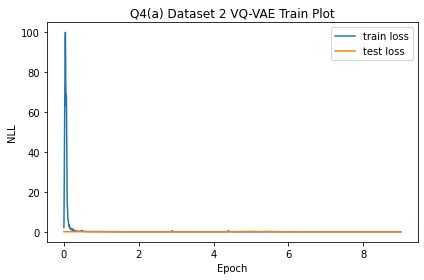

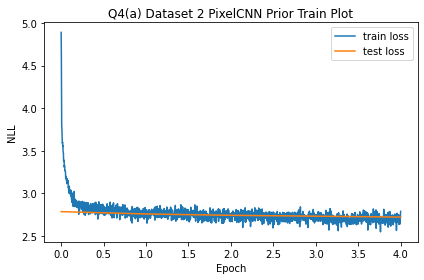

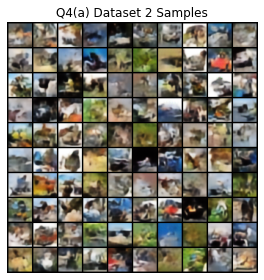

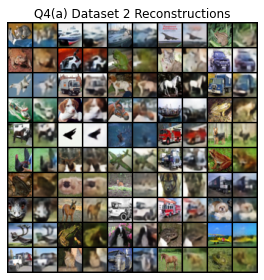

CPU times: user 19min 24s, sys: 11min 18s, total: 30min 43s
Wall time: 30min 58s


In [ ]:
%%time

q4_a_save_results(2, q4_a)

## Part (b) PixelVAE [5pts]
Implement and train a VAE with a PixelCNN decoder, and get it to produce good samples but not ignore latents. It may help to reference the latent variable model slides on techniques to prevent posterior collapse.

### Solution
Fill out the function below and return the neccessary arguments. Feel free to create more cells if need be

In [ ]:
# For debugging purpose

# data_dir = get_data_dir(3)
# train_data, test_data = load_pickled_data(join(data_dir, 'mnist.pkl'))
# train_data = (np.transpose(train_data, (0, 3, 1, 2))).astype('float32')
# test_data = (np.transpose(test_data, (0, 3, 1, 2))).astype('float32')
# train_loader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True)
# test_loader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=False)

In [ ]:
class LayerNorm(nn.LayerNorm):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
    
    def forward(self, x):
        x = x.permute(0, 2, 3, 1).contiguous()
        x = super().forward(x)
        return x.permute(0, 3, 1, 2).contiguous()

class MaskConv2d(nn.Conv2d):
    def __init__(self, mask_type, *args, conditional_size=None, **kwargs):
        assert mask_type == "A" or mask_type == "B"
        super().__init__(*args, **kwargs)
        self.conditional_size = conditional_size
        self.register_buffer("mask", torch.zeros_like(self.weight))
        self.create_mask(mask_type)
        if self.conditional_size is not None:
            if len(self.conditional_size) == 1:
                self.cond_op = nn.Linear(conditional_size[0], self.out_channels)
            else:
                self.cond_op = nn.Conv2d(
                    conditional_size[0], self.out_channels, kernel_size=3, padding=1
                )

    def create_mask(self, mask_type):
        k = self.kernel_size
        self.mask[:, :, :k[0] // 2] = 1
        self.mask[:, :, k[0] // 2, :k[1] // 2] = 1
        if mask_type == "B":
            self.mask[:, :, k[0] // 2, k[1] // 2] = 1

    def forward(self, x, cond=None):
        batch_size = x.shape[0]
        out = F.conv2d(
            input=x, 
            weight=self.mask * self.weight, 
            bias=self.bias, 
            stride=self.stride,
            padding=self.padding,
            dilation=self.dilation,
            groups=self.groups,
        )
        if self.conditional_size is not None:
            if len(self.conditional_size) == 1:
                out = out + self.cond_op(cond).view(batch_size, -1, 1, 1)
            else:
                out = out + self.cond_op(cond)
        return out

class PixelCnnDecoder(nn.Module):
    def __init__(
        self, input_shape, n_colors, n_filters, kernel_size, n_layers, conditional_size=None
    ):
        super().__init__()
        assert len(input_shape) == 3
        assert n_layers >= 2
        self.input_shape = input_shape
        k = kernel_size
        kwargs = dict(conditional_size=conditional_size)

        model = nn.ModuleList([
            MaskConv2d(
                "A", input_shape[0], n_filters, k, padding=k //2 , **kwargs
            ),
            LayerNorm(n_filters),
            nn.ReLU(),
        ])

        for _ in range(n_layers - 1):
            model.extend([                
                MaskConv2d(
                    "B", n_filters, n_filters, k, padding=k //2 , **kwargs
                ),
                LayerNorm(n_filters),
                nn.ReLU(),
            ])
        model.append(MaskConv2d("B", n_filters, n_colors, 1, **kwargs))
        self.net = model
        self.n_colors = n_colors

    def forward(self, x, cond=None):
        batch_size = x.shape[0]
        out = 2 * (x.float() / (self.n_colors - 1)) - 1
        for layer in self.net:
            if isinstance(layer, MaskConv2d):
                out = layer(out, cond=cond)
            else:
                out = layer(out)
        return out.view(batch_size, self.n_colors, *self.input_shape)

    def loss(self, x, cond=None):
        return F.cross_entropy(self(x, cond=cond), x.long(), reduction="none").view(
            x.shape[0], -1
        ).sum(1).mean()

    def sample(self, n, cond=None, device=device):
        samples = torch.zeros(n, *self.input_shape).to(device)
        with torch.no_grad():
            for r in range(self.input_shape[1]):
                for c in range(self.input_shape[2]):
                    for k in range(self.input_shape[0]):
                        logits = self(samples, cond=cond)[:, :, k, r, c]
                        probs = F.softmax(logits, dim=1)
                        samples[:, k, r, c] = torch.multinomial(probs, 1).squeeze(-1)
        return samples.permute(0, 2, 3, 1).cpu().numpy()

class ConvEncoder(nn.Module):
    def __init__(self, input_shape, latent_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(input_shape[0], 32, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, stride=2, padding=1),
        )
        out_dim = input_shape[1] // 4 * input_shape[2] // 4 * 128
        self.linear = nn.Linear(out_dim, 2 * latent_dim)

    def forward(self, x):
        out = self.net(x)
        out = out.view(out.shape[0], -1)
        mu, log_std = self.linear(out).chunk(2, dim=1)
        return mu, log_std

class PixelVAE(nn.Module):
    def __init__(self, input_shape, latent_dim, free_bits=10):
        super().__init__()
        assert len(input_shape) == 3
        self.latent_dim = latent_dim
        self.encoder = ConvEncoder(input_shape, latent_dim)
        self.decoder = PixelCnnDecoder(
            input_shape=input_shape, 
            n_colors=2, 
            n_filters=64, 
            kernel_size=7, 
            n_layers=8, 
            conditional_size=(latent_dim, )
        )
        self.free_bits = free_bits

    def loss(self, x):
        x_scaled = 2 * x - 1
        mu, log_std = self.encoder(x_scaled)
        z = torch.randn_like(mu) * log_std.exp() + mu
        recon_loss = self.decoder.loss(x, cond=z)
        kl_loss = - log_std + 0.5 * (torch.exp(2 * log_std) + mu ** 2) - 0.5
        kl_loss = torch.clamp(kl_loss.sum(1), min=self.free_bits).mean()
        return OrderedDict(loss=recon_loss + kl_loss, recon_loss=recon_loss, kl_loss=kl_loss)

    def sample(self, n):
        with torch.no_grad():
            z = torch.randn(n, self.latent_dim).to(device)
            samples = self.decoder.sample(n, cond=z)
        return samples


# For debugging purpose

# model = PixelVAE(input_shape=(1, 28, 28), latent_dim=16).to(device)
# for x in train_loader:
#     x = x.to(device)
#     print(x.shape)
#     print(x.min(), x.max())
#     with torch.no_grad():
#         print(model.loss(x))
#     break
# print(model.sample(5).shape)

In [ ]:
def q4_b(train_data, test_data):
    """
    train_data: An (n_train, 28, 28, 1) uint8 numpy array of MNIST binary images
    test_data: An (n_test, 28, 28, 1) uint8 numpy array of MNIST binary images

    Returns
    - a (# of training iterations, 3) numpy array of full negative ELBO, reconstruction loss E[-log p(x|z)],
      and KL term E[KL(q(z|x) | p(z))] evaluated every minibatch
    - a (# of epochs + 1, 3) numpy array of full negative ELBO, reconstruciton loss E[-p(x|z)],
      and KL term E[KL(q(z|x) | p(z))] evaluated once at initialization and after each epoch
    - a (100, 28, 28, 1) numpy array of 100 samples with values in {0, 1}
    - a (100, 28, 28, 1) numpy array of 50 real-image / reconstruction pairs with values in {0, 1}
    """

    """ YOUR CODE HERE """ 
    train_data = (np.transpose(train_data, (0, 3, 1, 2))).astype('float32')
    test_data = (np.transpose(test_data, (0, 3, 1, 2))).astype('float32')
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=False)
    input_shape = tuple(train_data.shape[1:])

    model = PixelVAE(input_shape=input_shape, latent_dim=16).to(device)

    train_losses, test_losses = train(
        model, train_loader, test_loader, dict(n_epochs=10, lr=1e-3), print_every=1
    )
    train_losses = np.stack(
        (train_losses["loss"], train_losses["recon_loss"], train_losses["kl_loss"]), axis=1
    )
    test_losses = np.stack(
        (test_losses["loss"], test_losses["recon_loss"], test_losses["kl_loss"]), axis=1
    )
    samples = model.sample(100)

    x = next(iter(test_loader))[:50].to(device)
    with torch.no_grad():
        z, _ = model.encoder(2 * x - 1)
        x_recon = model.decoder.sample(50, cond=z)
        x = x.permute(0, 2, 3, 1).cpu().numpy()
    recons = np.stack((x, x_recon), axis=1).reshape(
        (-1, input_shape[1], input_shape[2], input_shape[0])
    )
    return train_losses, test_losses, samples, recons

### Results
Once you've finished `q4_b`, execute the cells below to visualize and save your results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Epoch 1, time elapsed 2.535 min
Train loss: loss 168.6254, recon_loss 154.6980, kl_loss 13.9275
Test loss: loss 107.2563, recon_loss 86.4959, kl_loss 20.7603


Epoch 2, time elapsed 5.078 min
Train loss: loss 98.2933, recon_loss 76.1680, kl_loss 22.1253
Test loss: loss 89.3379, recon_loss 65.5803, kl_loss 23.7576


Epoch 3, time elapsed 7.624 min
Train loss: loss 88.8213, recon_loss 64.6154, kl_loss 24.2059
Test loss: loss 84.6721, recon_loss 61.0175, kl_loss 23.6546


Epoch 4, time elapsed 10.165 min
Train loss: loss 84.7369, recon_loss 59.7816, kl_loss 24.9553
Test loss: loss 82.3767, recon_loss 57.9774, kl_loss 24.3993


Epoch 5, time elapsed 12.709 min
Train loss: loss 82.2091, recon_loss 56.8976, kl_loss 25.3115
Test loss: loss 80.6059, recon_loss 55.6405, kl_loss 24.9654


Epoch 6, time elapsed 15.252 min
Train loss: loss 76.5771, recon_loss 53.2839, kl_loss 23.2931
Test loss: loss 70.3870, recon_loss 50.2076, kl_loss 20.1795


Epoch 7, time elapsed 17.793 min
Train loss: loss 68.1817, recon_loss 50.5586, kl_loss 17.6231
Test loss: loss 64.3294, recon_loss 49.7590, kl_loss 14.5705


Epoch 8, time elapsed 20.333 min
Train loss: loss 62.8544, recon_loss 49.5157, kl_loss 13.3387
Test loss: loss 61.4305, recon_loss 49.2862, kl_loss 12.1444


Epoch 9, time elapsed 22.874 min
Train loss: loss 61.1327, recon_loss 49.2870, kl_loss 11.8457
Test loss: loss 60.6410, recon_loss 48.9180, kl_loss 11.7230


Epoch 10, time elapsed 25.413 min
Train loss: loss 60.1772, recon_loss 48.8500, kl_loss 11.3272
Test loss: loss 59.7580, recon_loss 48.5726, kl_loss 11.1855
Final -ELBO: 59.7580, Recon Loss: 48.5726, KL Loss: 11.1855


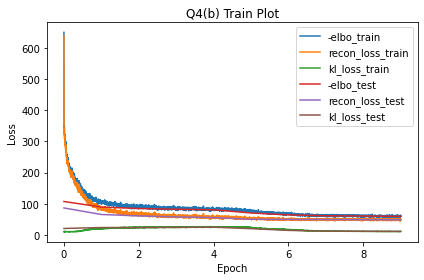

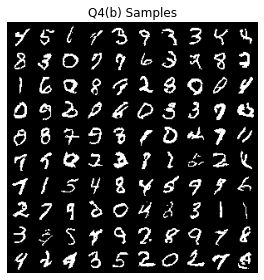

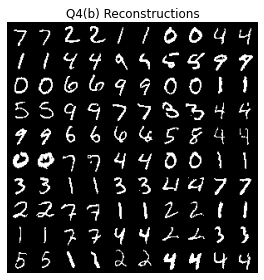

CPU times: user 16min 55s, sys: 10min 19s, total: 27min 15s
Wall time: 27min 22s


In [ ]:
%%time

q4_b_save_results(q4_b)

# File Saving Utility


In [ ]:
# one way to save files
from google.colab import files
import os
import os.path as osp
for fname in os.listdir('results'):
    files.download('results/' + fname)